In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path

import isotools
from isotools.transcriptome import Transcriptome
from isotools.plots import plot_bar, plot_distr, plot_saturation

In [2]:
#Set reference and data paths
reference_folder = Path("/mnt/group/references/genomic/homo_sapiens/sequences")
genome = reference_folder.joinpath('gencode_v38', 'GRCh38.p13.genome.fa')
anno   = reference_folder.joinpath('gencode_v38', 'gencode.v38.chr_patch_hapl_scaff.basic.annotation.gff3.gz')

In [3]:
#Load reference.

#After the reference is initially imported, can use the pickled file to speed things up
if Path("/home/milo/workspace/isotools/gencode_v38.isotools.pkl").exists():
    isoseq = isotools.Transcriptome.from_reference("/home/milo/workspace/isotools/gencode_v38.isotools.pkl")
else:
    isoseq = isotools.Transcriptome.from_reference(str(anno))

importing reference from .gff3 file /mnt/group/references/genomic/homo_sapiens/sequences/gencode_v38/gencode.v38.chr_patch_hapl_scaff.basic.annotation.gff3.gz
|          | 2043939/? [00:58<00:00, 34957.07it/s]                                                                                                                                                                                                                           
skipped the following categories: {'five_prime_UTR', 'CDS', 'three_prime_UTR', 'stop_codon_redefined_as_selenocysteine'}


In [4]:
#isoseq.save_reference("gencode_v38.isotools.pkl")

In [8]:
sample_dir = Path("/mnt/scratch/isoseq/data/09_sorted/")
sample_dir.exists()

True

In [9]:
stuff = list(sample_dir.glob("**/*.bam"))
stuff

[PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1001.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1002.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1003.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1004.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1005.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1006.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1008.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1012.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1018.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1019.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1020.mapped.sorted.bam'),
 PosixPath('/mnt/scratch/isoseq/data/09_sorted/bc1023.mapped.sorted.bam')]

In [13]:
stuff[0].stem.split(".")[0]

'bc1001'

In [14]:
#find bam files and associate with sample barcodes
sample_bams = pd.DataFrame.from_dict(
    {
        _.stem.split(".")[0]: _ 
        for _
        in sample_dir.glob("**/*.bam")
    },
    orient = "index",
    columns = ["file"]
).reset_index(
).rename(columns={"index": "barcode"})

sample_bams

barcode                                               file
0   bc1001  /mnt/scratch/isoseq/data/09_sorted/bc1001.mapp...
1   bc1002  /mnt/scratch/isoseq/data/09_sorted/bc1002.mapp...
2   bc1003  /mnt/scratch/isoseq/data/09_sorted/bc1003.mapp...
3   bc1004  /mnt/scratch/isoseq/data/09_sorted/bc1004.mapp...
4   bc1005  /mnt/scratch/isoseq/data/09_sorted/bc1005.mapp...
5   bc1006  /mnt/scratch/isoseq/data/09_sorted/bc1006.mapp...
6   bc1008  /mnt/scratch/isoseq/data/09_sorted/bc1008.mapp...
7   bc1012  /mnt/scratch/isoseq/data/09_sorted/bc1012.mapp...
8   bc1018  /mnt/scratch/isoseq/data/09_sorted/bc1018.mapp...
9   bc1019  /mnt/scratch/isoseq/data/09_sorted/bc1019.mapp...
10  bc1020  /mnt/scratch/isoseq/data/09_sorted/bc1020.mapp...
11  bc1023  /mnt/scratch/isoseq/data/09_sorted/bc1023.mapp...

In [15]:
#import subject metadata
metadata = pd.read_csv(Path("/mnt/scratch/isoseq/sample_info.csv"))
metadata

barcode  subject_id disease_class ethnicity
0   bc1001  590085-5-4           NEG        EA
1   bc1002  590108-5-4           SLE        EA
2   bc1003      541305           NEG        AA
3   bc1004      541308           POS        AA
4   bc1005      541424           POS        AA
5   bc1006      541561           NEG        EA
6   bc1008      541826           POS        EA
7   bc1012      510099           NEG        AA
8   bc1018  550003-6-2           SLE        AA
9   bc1019  500066-6-2           SLE        AA
10  bc1020  500028-6-4           SLE        EA
11  bc1023      541522           POS        EA

In [16]:
#Add bam file locations to sample metadata
sample_data = metadata.merge(sample_bams, on = "barcode")
sample_data

barcode  subject_id disease_class ethnicity  \
0   bc1001  590085-5-4           NEG        EA   
1   bc1002  590108-5-4           SLE        EA   
2   bc1003      541305           NEG        AA   
3   bc1004      541308           POS        AA   
4   bc1005      541424           POS        AA   
5   bc1006      541561           NEG        EA   
6   bc1008      541826           POS        EA   
7   bc1012      510099           NEG        AA   
8   bc1018  550003-6-2           SLE        AA   
9   bc1019  500066-6-2           SLE        AA   
10  bc1020  500028-6-4           SLE        EA   
11  bc1023      541522           POS        EA   

                                                 file  
0   /mnt/scratch/isoseq/data/09_sorted/bc1001.mapp...  
1   /mnt/scratch/isoseq/data/09_sorted/bc1002.mapp...  
2   /mnt/scratch/isoseq/data/09_sorted/bc1003.mapp...  
3   /mnt/scratch/isoseq/data/09_sorted/bc1004.mapp...  
4   /mnt/scratch/isoseq/data/09_sorted/bc1005.mapp...  
5   /mnt/scratch/isoseq/data/09_sorted/bc1006.mapp...  
6   /mnt/scratch/isoseq/data/09_sorted/bc1008.mapp...  
7   /mnt/scratch/isoseq/data/09_sorted/bc1012.mapp...  
8   /mnt/scratch/isoseq/data/09_sorted/bc1018.mapp...  
9   /mnt/scratch/isoseq/data/09_sorted/bc1019.mapp...  
10  /mnt/scratch/isoseq/data/09_sorted/bc1020.mapp...  
11  /mnt/scratch/isoseq/data/09_sorted/bc1023.mapp...

In [17]:
for sample in sample_data.itertuples():
    isoseq.add_sample_from_bam(
        sample.file,
        sample_name=sample.subject_id,
        group=f'{sample.ethnicity}_{sample.disease_class}'
    )

adding sample 590085-5-4 from file /mnt/scratch/isoseq/data/09_sorted/bc1001.mapped.sorted.bam
100%|██████████| 25864.0/25864 [00:21<00:00, 1214.93reads/s, chr=KI270757.1]                                                                                                                                                                                                 
imported 23 chimeric alignments that can be chained to single nonchimeric transcripts (long intron alingment split)
ignoring 310 chimeric alignments with less than 2 reads
imported 25083 nonchimeric reads (including  23 chained chimeric alignments) and 33 chimeric reads with coverage of at least 2.
adding sample 590108-5-4 from file /mnt/scratch/isoseq/data/09_sorted/bc1002.mapped.sorted.bam
100%|██████████| 26402.0/26402 [00:12<00:00, 2079.47reads/s, chr=KI270757.1]                                                                                                                                                                    

In [18]:
sample_groups={
        "NEG": ["590085-5-4", "541305", "541561", "510099"],
        "POS": ["541308", "541424", "541826", "541522"],
        "SLE": ["590108-5-4","550003-6-2","500066-6-2","500028-6-4"],
    }

In [19]:
isoseq.add_qc_metrics(genome)
isoseq.make_index()

100%|██████████| 75593/75593 [02:54<00:00, 433.47it/s]                                                                                                                                                                                                                       


In [20]:
isoseq.save("all_pilot_samples.pkl")

saving transcriptome to all_pilot_samples.pkl


In [21]:
from isotools import DEFAULT_GENE_FILTER, DEFAULT_TRANSCRIPT_FILTER,DEFAULT_REF_TRANSCRIPT_FILTER
ref_filter=DEFAULT_REF_TRANSCRIPT_FILTER
#lets define some custom reference filter flags based on the gencode specific transcript information:
ref_filter['HIGH_SUPPORT']='transcript_support_level=="1"'
ref_filter['PROTEIN_CODING']='transcript_type=="protein_coding"'
print(DEFAULT_TRANSCRIPT_FILTER)

gene_filter=DEFAULT_GENE_FILTER
isoseq.add_filter( gene_filter=gene_filter, ref_transcript_filter=ref_filter)

{'INTERNAL_PRIMING': 'len(exons)==1 and downstream_A_content and downstream_A_content>.5', 'RTTS': 'noncanonical_splicing and novel_splice_sites and any(2*i in novel_splice_sites[0] and 2*i+1 in novel_splice_sites[0] for i,_ in noncanonical_splicing)', 'NONCANONICAL_SPLICING': 'noncanonical_splicing', 'NOVEL_TRANSCRIPT': 'annotation is None or annotation[0]>0', 'FRAGMENT': 'fragments and any("novel exonic " in a or "fragment" in a for a in annotation[1])', 'NOVEL': 'not annotation or annotation[0]==4', 'UNSPLICED': 'len(exons)==1', 'MULTIEXON': 'len(exons)>1'}


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75593/75593 [00:01<00:00, 58553.62it/s]


In [23]:
mito = {"chrM": isoseq.data["chrM"]}

In [24]:
print(list(mito["chrM"])[0])

Gene MT-TF chrM:576-647(+), 1 reference transcripts, 0 expressed transcripts


In [25]:
mt_tl2 = list(mito["chrM"])[0]

In [29]:
from pprint import pprint

In [30]:
def _eval_filter_fun(fun, name, args):
    """Decorator for the filter functions, which are lambdas and thus cannot have normal decorators.
    On exceptions the provided parameters are reported. This is helpfull for debugging."""
    try:
        return fun(**args)
    except Exception as e:
        pprint(f"error when evaluating filter {name} with arguments {str(args)}: {str(e)}")
        raise  # either stop evaluation
        # return False   #or continue

In [33]:
chr22 = {"chr22": isoseq.data["chr22"]}

In [35]:
chr22_list = list(chr22["chr22"])

In [39]:
isoseq.save("gencode_aligned_clustered.pkl")

saving transcriptome to gencode_aligned_clustered.pkl


In [31]:
_eval_filter_fun("NOVEL_GENE", "not reference", mito)

("error when evaluating filter not reference with arguments {'chrM': "
 'IntervalTree([<isotools.gene.Gene object at 0x7f657c223f90>, '
 '<isotools.gene.Gene object at 0x7f657c223e50>, <isotools.gene.Gene object at '
 '0x7f657c223ea0>, <isotools.gene.Gene object at 0x7f6585405e00>, '
 '<isotools.gene.Gene object at 0x7f6585566c20>, <isotools.gene.Gene object at '
 '0x7f657c223450>, <isotools.gene.Gene object at 0x7f658638d810>, '
 '<isotools.gene.Gene object at 0x7f657c225d10>, <isotools.gene.Gene object at '
 '0x7f657c225f90>, <isotools.gene.Gene object at 0x7f657c225590>, '
 '<isotools.gene.Gene object at 0x7f657c225ae0>, <isotools.gene.Gene object at '
 '0x7f657c2259a0>, <isotools.gene.Gene object at 0x7f657c225db0>, '
 '<isotools.gene.Gene object at 0x7f657c225cc0>, <isotools.gene.Gene object at '
 '0x7f65867759a0>, <isotools.gene.Gene object at 0x7f657c225ef0>, '
 '<isotools.gene.Gene object at 0x7f657c22cf90>, <isotools.gene.Gene object at '
 '0x7f657c22c3b0>, <isotools.gene.Gene

TypeError: 'str' object is not callable

In [13]:
#compute some summary statistics on technical artifacts.
tr_stats=[
    isoseq.transcript_length_hist(
        groups=sample_groups,
        add_reference=True,
        min_coverage=2,
        tr_filter=dict(remove=['NOVEL_GENE']),
        ref_filter=dict(include=['HIGH_SUPPORT'])
    ),
    isoseq.downstream_a_hist(
        groups=sample_groups,
        tr_filter=dict( remove=['NOVEL_GENE', 'UNSPLICED']),
        ref_filter=dict(remove=['UNSPLICED'])
    ),
    isoseq.downstream_a_hist(
        groups=sample_groups,
        tr_filter=dict(include=['NOVEL_GENE', 'UNSPLICED'])
    ),
    isoseq.direct_repeat_hist(
        groups=sample_groups,
        bins=np.linspace(-.5,10.5,12)
     )
]

In [14]:
tr_stats[0][0]

NEG   POS   SLE  reference
from    to                                 
-0.5    199.5      0     0     2         12
 199.5  399.5     17    16    23        192
 399.5  599.5    167   154   172        797
 599.5  799.5    307   269   278       1380
 799.5  999.5    671   585   622       1545
 999.5  1199.5   804   790   809       1733
 1199.5 1399.5  1232  1090  1179       1867
 1399.5 1599.5  1657  1658  1723       2136
 1599.5 1799.5  2182  2045  2104       2068
 1799.5 1999.5  2270  2265  2472       2028
 1999.5 2199.5  3200  3027  3169       1900
 2199.5 2399.5  2794  2776  3022       1657
 2399.5 2599.5  3444  3431  3669       1556
 2599.5 2799.5  3982  3869  4416       1357
 2799.5 2999.5  3779  3812  4249       1224
 2999.5 3199.5  4211  4266  4605       1130
 3199.5 3399.5  4182  4332  4714       1050
 3399.5 3599.5  4162  4348  4698        923
 3599.5 3799.5  4435  4648  4836        899
 3799.5 3999.5  3657  4050  4039        769
 3999.5 4199.5  3512  3890  4075        740
 4199.5 4399.5  2935  3341  3292        671
 4399.5 4599.5  2364  2732  2717        565
 4599.5 4799.5  1824  1995  1900        517
 4799.5 4999.5  1484  1861  1874        483
 4999.5 5199.5  1162  1420  1322        430
 5199.5 5399.5   948  1044  1032        439
 5399.5 5599.5   740   871   801        387
 5599.5 5799.5   776   805   690        382
 5799.5 5999.5   477   589   551        337
 5999.5 6199.5   398   459   428        287
 6199.5 6399.5   267   373   353        245
 6399.5 6599.5   206   264   240        234
 6599.5 6799.5   150   208   206        215
 6799.5 6999.5    87   146   167        245
 6999.5 7199.5   106   138   127        144
 7199.5 7399.5    64   110   107        164
 7399.5 7599.5    43    64    71        142
 7599.5 7799.5    37    73    73        129
 7799.5 7999.5    46    55    52        124
 7999.5 8199.5    35    46    34        100
 8199.5 8399.5    43    53    33         89
 8399.5 8599.5     7    14    11        112
 8599.5 8799.5     0    13     7         86
 8799.5 8999.5     3     3     3         60
 8999.5 9199.5     3     0     0         59
 9199.5 9399.5     0     0     0         71
 9399.5 9599.5     0     0     0         57
 9599.5 9799.5     0     0     0         57
 9799.5 9999.5     0     5     3         47

In [15]:
tr_stats.append(
    (
        pd.concat(
            [
                tr_stats[2][0].add_suffix(
                    ' novel unspliced'
                ),tr_stats[1][0].add_suffix(
                    ' known multiexon'
                )
            ],
            axis=1
        ),tr_stats[2][1]
    )
)

In [16]:
#statistic on the filter flags
f_stats=isoseq.filter_stats(
    groups=sample_groups,
    weight_by_coverage=True,
    min_coverage=1
)

In [17]:
f_stats[0].index=f_stats[0].index.str.replace('_','\n')

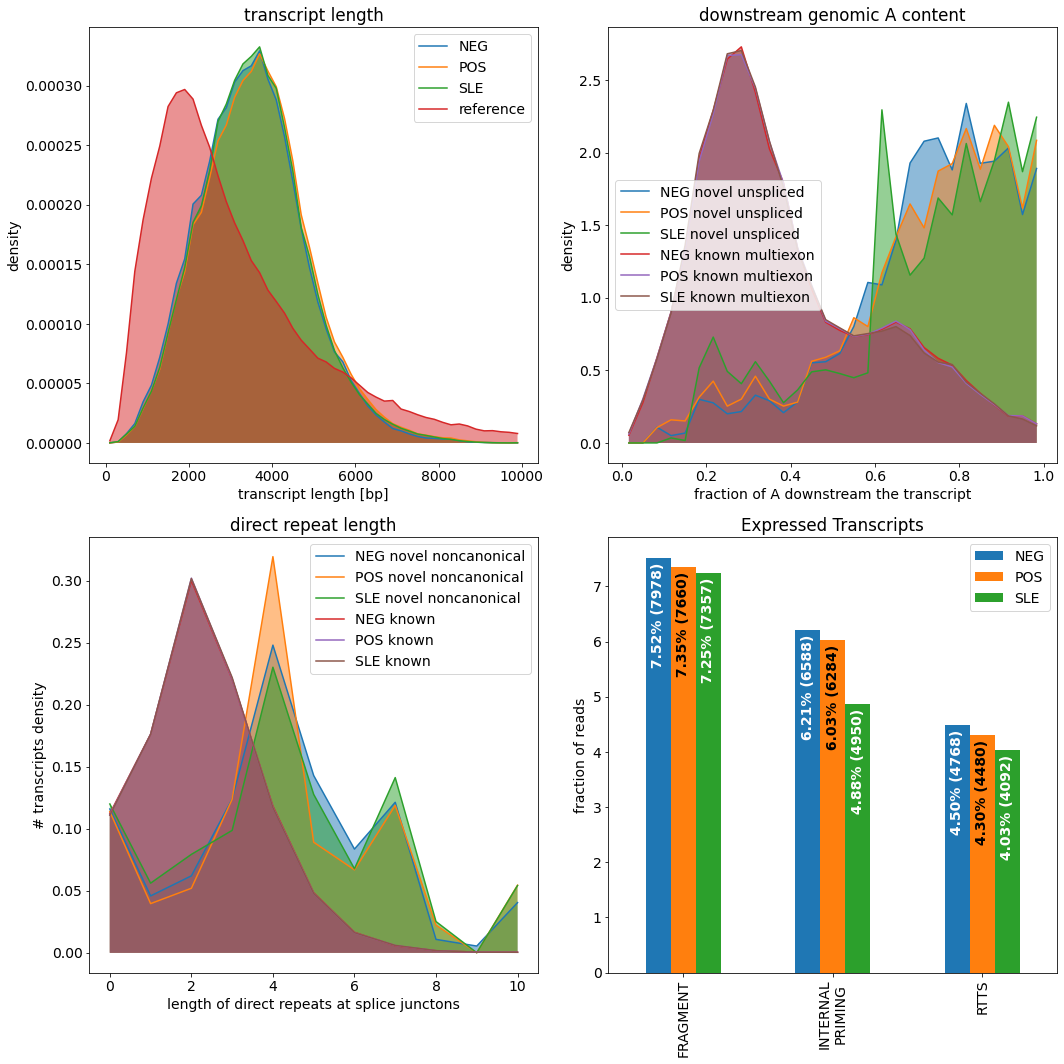

In [18]:
#QC plot
from isotools.plots import plot_bar, plot_distr

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 14})


fig, axs = plt.subplots(2,2)
#A) transcript length
plot_distr(tr_stats[0][0],smooth=3,ax=axs[0,0],**tr_stats[0][1])
#B) internal priming
plot_distr(tr_stats[4][0],smooth=3,ax=axs[0,1],density=True,fill=True, **tr_stats[4][1])
#C) RTTS
plot_distr(tr_stats[3][0],ax=axs[1,0],density=True,**tr_stats[3][1])
#D) frequency of artifacts
plot_bar(f_stats[0],ax=axs[1,1],drop_categories=['MULTIEXON','NOVEL\nTRANSCRIPT','NOVEL','UNSPLICED','NONCANONICAL\nSPLICING' ],**f_stats[1])

fig.tight_layout()

In [19]:
ref=[[[12,20],[30,40], [50,60],[70,81]],
     [[11,20],[35,40],         [70,79]],
     [[10,20],[30,40], [50,60],[75,80]]]
novel={'FSM':         [[10,20],[30,40], [50,60],[70,80]],
       "5' fragment": [[33,40], [50,60],[70,80]],
       "3' fragment": [[10,20],[30,40], [50,55]],
       "mono exon"  : [[22,35]],
       "exon skipping"     :  [[10,20], [50,60],[70,80]],
       "intron retention"  :  [[10,40], [50,60],[70,80]],
       "novel combination" :  [[10,20],[35,40], [50,60],[75,80]],
       "novel junction"  :   [[10,20],[30,40], [75,80]],
       "novel exonic TSS"  :  [[26,40], [50,60],[70,80]],
       "novel exonic PAS"  :  [[10,20],[30,40], [50,66]],
       "novel 5' splice site":[[10,24],[30,40], [50,60],[70,80]],
       "novel 3' splice site":[[10,20],[26,40], [50,60],[70,80]],
       "novel exon"  :        [[10,20],[30,40],[43,47], [50,60],[70,80]],
       "novel intronic TSS" : [[43,47],[50,60],[70,80]],
       "novel intronic PAS" : [[10,20],[30,40], [82,90]]}
ref={'transcripts':[{'exons':e, 'transcript_name':f'reference {i+1}'} for i,e in enumerate(ref)]}
transcripts=[{'exons':e, 'transcript_name':n} for n,e in novel.items()]
cat=['FSM','ISM','NIC','NNC','novel gene']

In [20]:
cnr={}
for g, trid, tr in isoseq.iter_transcripts():
    for anno in tr['annotation'][1]:
        cnr[anno]=min(cnr.get(anno,5),tr['annotation'][0])
        
del cnr['FSM']

altsplice=[
    isoseq.altsplice_stats(
        #groups=isoseq.groups(),
        groups=sample_groups,
        weight_by_coverage=True,
        min_coverage=1,
        tr_filter=dict(remove=['RTTS', 'FRAGMENT', 'INTERNAL_PRIMING'])
    ),
    isoseq.altsplice_stats(
        #groups=isoseq.groups(),
        groups=sample_groups,
        weight_by_coverage=True,
        min_coverage=2,
        tr_filter=dict( remove=['RTTS', 'FRAGMENT', 'INTERNAL_PRIMING'])
    ),
    isoseq.altsplice_stats(
        #groups=isoseq.groups(),
        groups=sample_groups,
        weight_by_coverage=False,
        min_coverage=20,
        tr_filter=dict( remove=['RTTS', 'FRAGMENT', 'INTERNAL_PRIMING'])
    )
]
for i in range(3):
    altsplice[i][0].index=altsplice[i][0].index+[f'\n({cat[cnr[subcat]]})' if subcat in cnr else '' for subcat in altsplice[i][0].index]
    altsplice[i][0].index=altsplice[i][0].index.str.replace('splice ','\nsplice ')

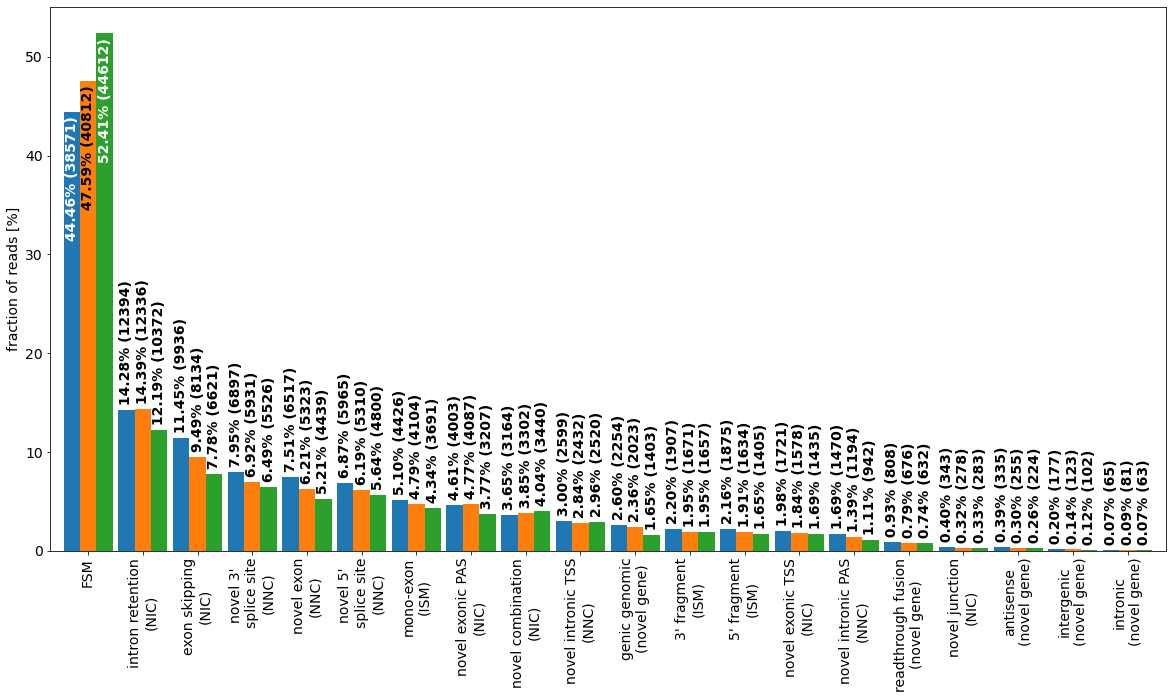

In [21]:
from isotools.plots import plot_bar, plot_distr

plt.rcParams["figure.figsize"] = (20,10)
_=plot_bar(altsplice[0][0],bar_width=.9,ylabel='fraction of reads [%]', legend=False, rot=90,)

In [22]:
import re

In [23]:
coord = re.compile("[0-9]+\-[0-9]+")

In [24]:
coord

re.compile(r'[0-9]+\-[0-9]+', re.UNICODE)

In [25]:
coord.search(str(isoseq['MAPT']).split(" ")[2]).group(0).split("-")

['45894526', '46028334']

In [26]:
isoseq['MAPT'].__str__().split(" ")[2]

'chr17:45894526-46028334(+),'

In [27]:
goi = "IKZF1"

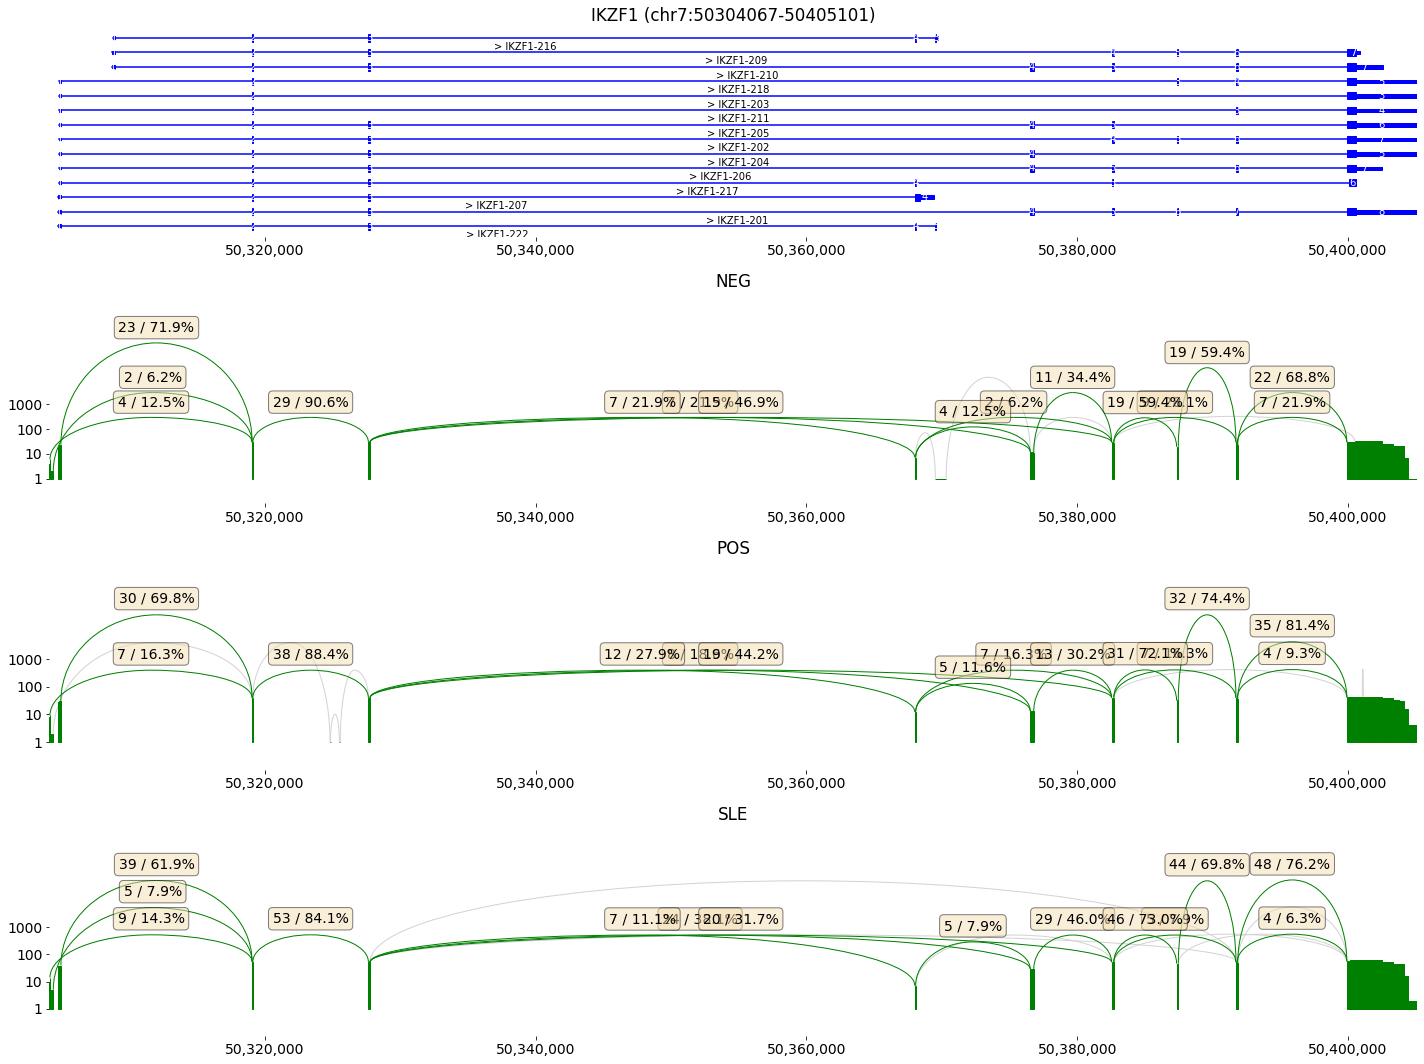

In [28]:
plt.rcParams["figure.figsize"] = (20,15)
fig,axs=isoseq[goi].sashimi_figure(samples=sample_groups, x_range=[int(_) for _ in coord.search(isoseq[goi].region).group(0).split("-")])
fig.tight_layout()

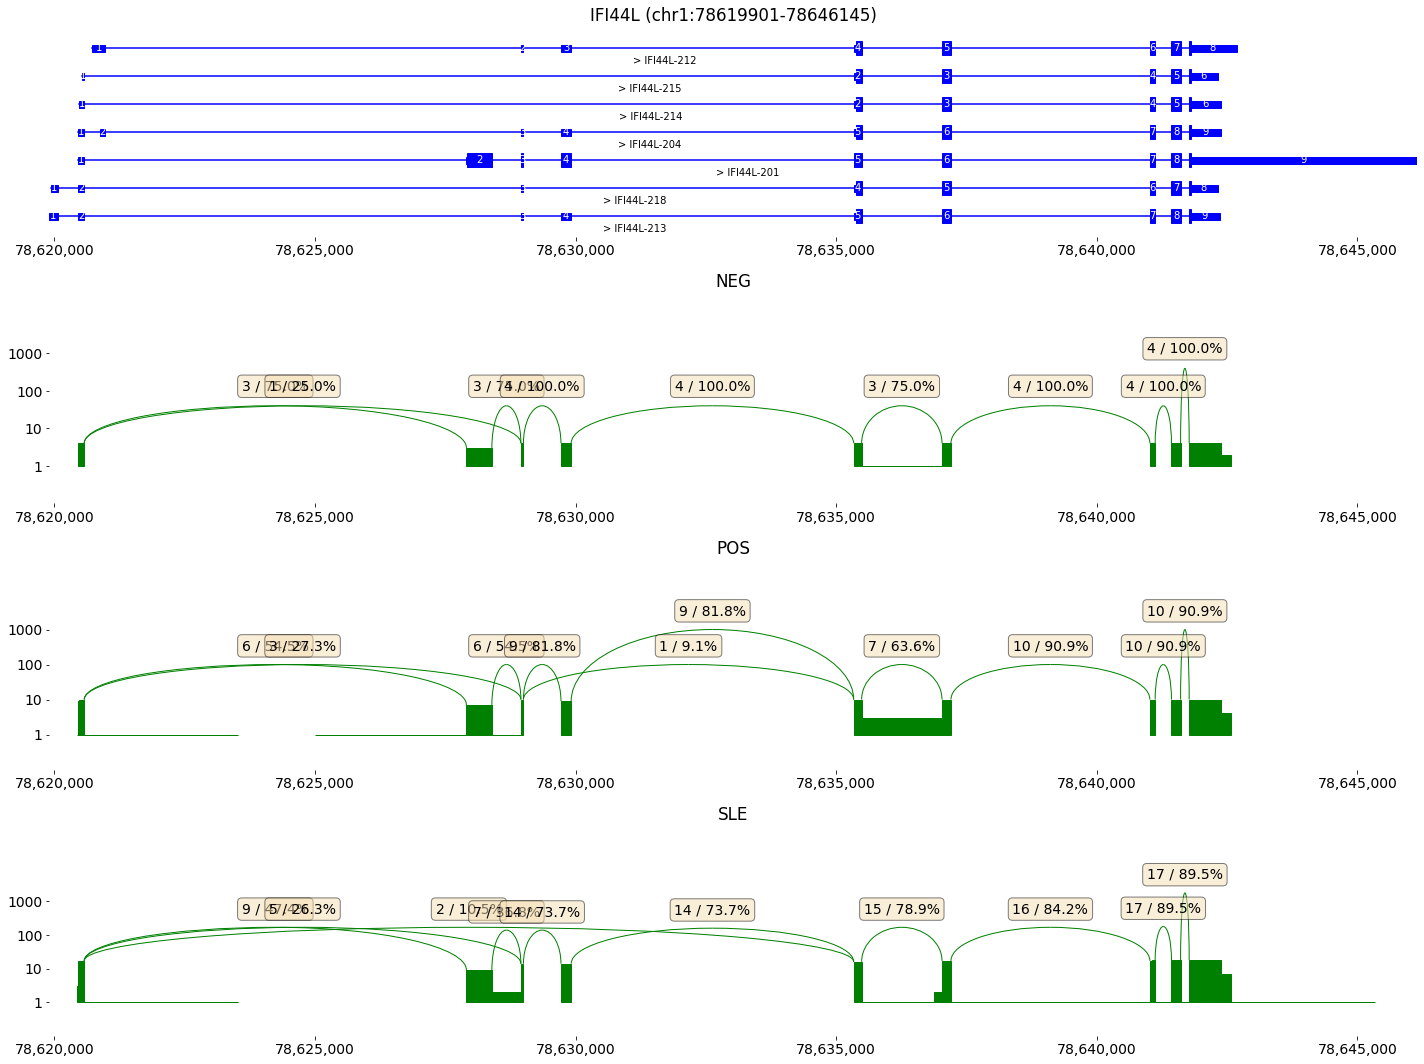

In [29]:
goi = "IFI44L"
plt.rcParams["figure.figsize"] = (20,15)
fig,axs=isoseq[goi].sashimi_figure(samples=sample_groups, x_range=[int(_) for _ in coord.search(isoseq[goi].region).group(0).split("-")])
fig.tight_layout()

In [30]:
from isotools.plots import plot_embedding

/home/milo/miniconda3/envs/isotools/lib/python3.8/site-packages/isotools/plots.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  p = ((k.values + scaled_mean[:, np.newaxis]) / (n.values + prior_count)).T
/home/milo/miniconda3/envs/isotools/lib/python3.8/site-packages/isotools/plots.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  p = ((k.values + scaled_mean[:, np.newaxis]) / (n.values + prior_count)).T
/home/milo/miniconda3/envs/isotools/lib/python3.8/site-packages/isotools/plots.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  p = ((k.values + scaled_mean[:, np.ne

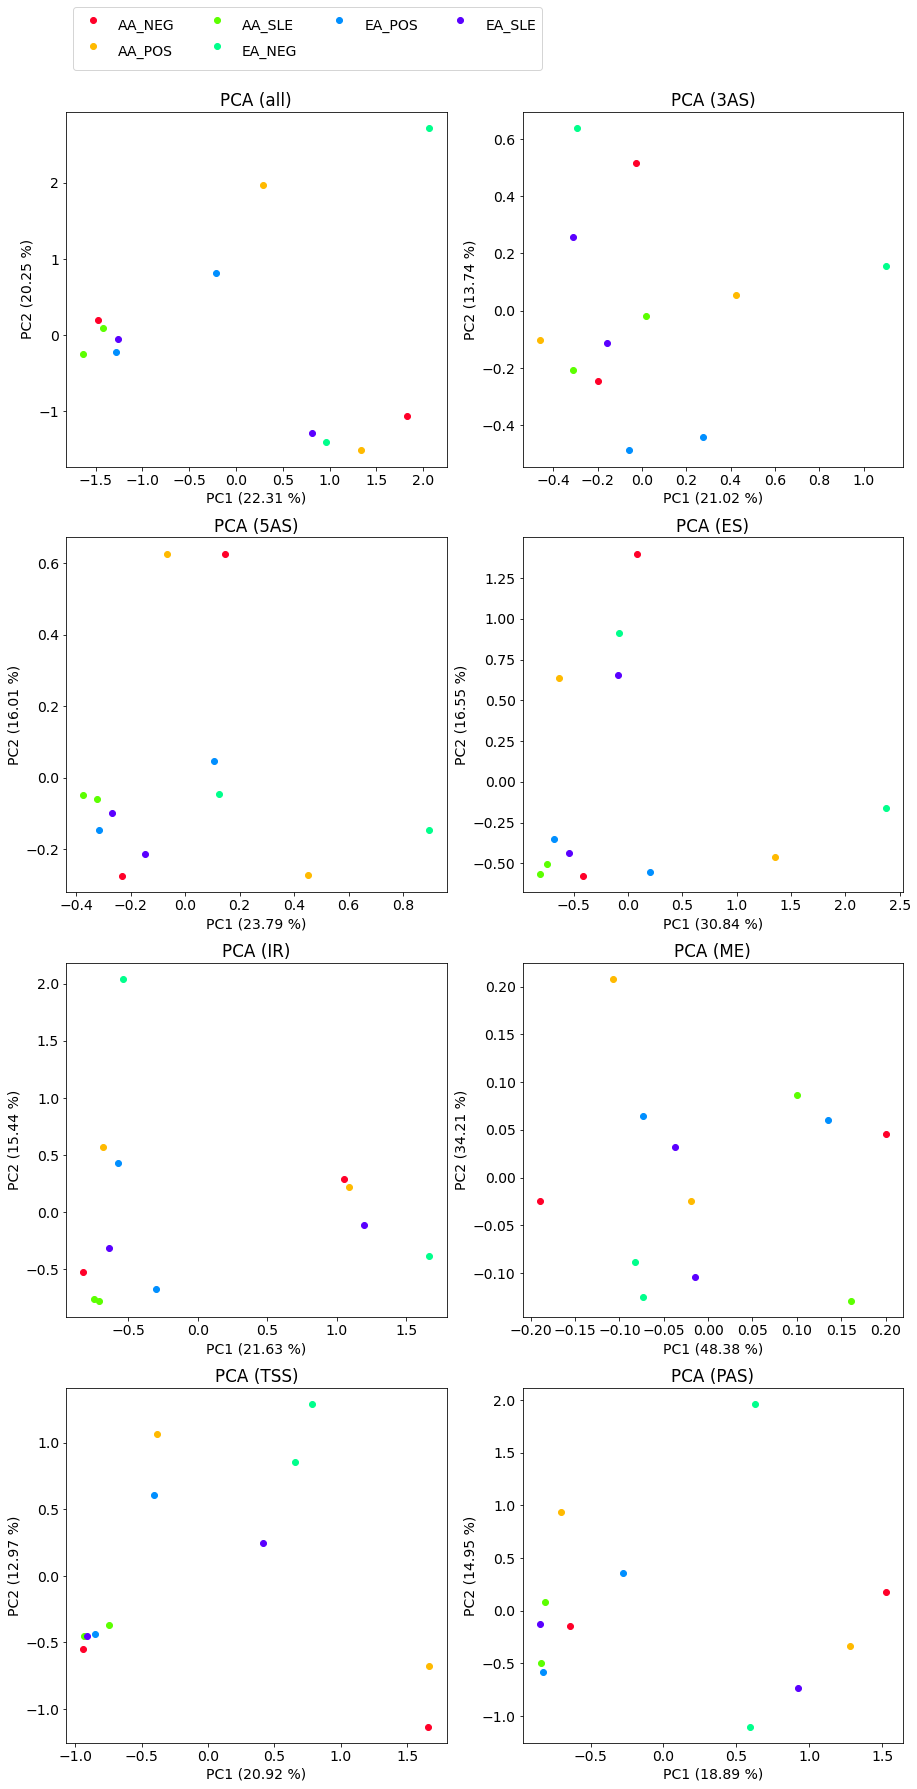

In [31]:
pca={}

splice_events=isoseq.alternative_splicing_events()

plt.rcParams["figure.figsize"] = (15,30)
f,axs=plt.subplots(4,2)
for ax,t in zip(axs.flatten(),['all','3AS','5AS','ES','IR','ME', 'TSS', 'PAS']):
    pca[t]=plot_embedding(splice_events, ax=ax, labels=False, groups=isoseq.groups(), splice_types=t)

axs[0,0].legend(fontsize='medium', ncol=4,handleheight=2.4, labelspacing=0.05, bbox_to_anchor=(0, 1.1), loc='lower left')

/home/milo/miniconda3/envs/isotools/lib/python3.8/site-packages/isotools/plots.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  p = ((k.values + scaled_mean[:, np.newaxis]) / (n.values + prior_count)).T
/home/milo/miniconda3/envs/isotools/lib/python3.8/site-packages/isotools/plots.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  p = ((k.values + scaled_mean[:, np.newaxis]) / (n.values + prior_count)).T
/home/milo/miniconda3/envs/isotools/lib/python3.8/site-packages/isotools/plots.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  p = ((k.values + scaled_mean[:, np.ne

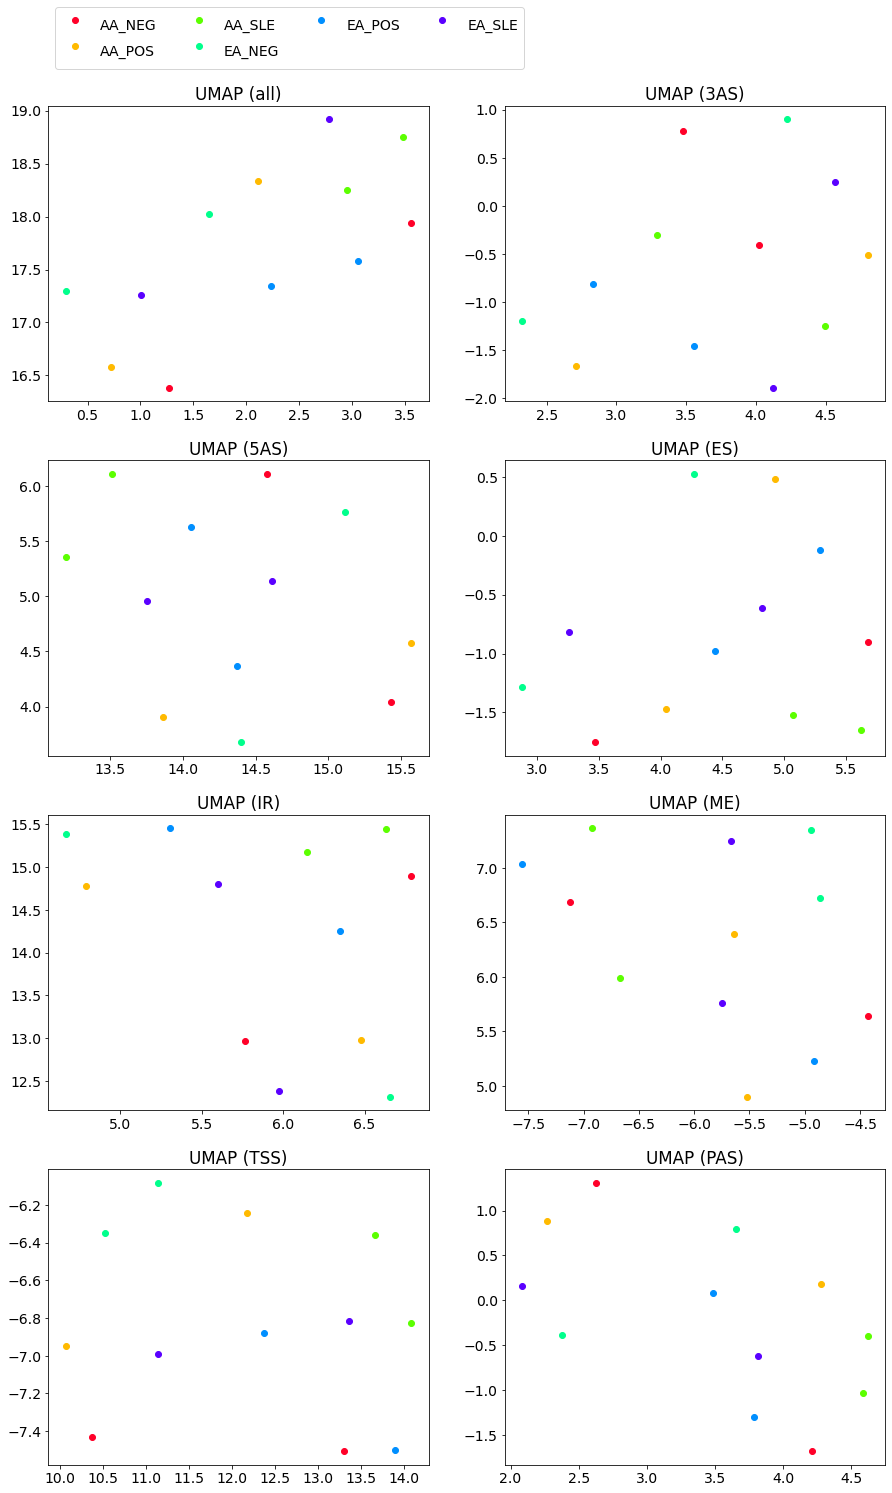

In [32]:
plt.rcParams["figure.figsize"] = (15,25)
umap={}
f,axs=plt.subplots(4,2)
for ax,t in zip(axs.flatten(),['all','3AS','5AS','ES','IR','ME', 'TSS', 'PAS']):
    umap[t]=plot_embedding(splice_events, method='UMAP',n_neighbors=6, ax=ax, labels=False, groups=isoseq.groups(), splice_types=t)


axs[0,0].legend(fontsize='medium', ncol=4,handleheight=2.4, labelspacing=0.05, bbox_to_anchor=(0, 1.1), loc='lower left')

In [33]:
cname=['FSM','ISM','NIC','NNC','novel gene']
cnr={}
for g, trid, tr in isoseq.iter_transcripts():
    for anno in tr['annotation'][1]:
        cnr[anno]=min(cnr.get(anno,5),tr['annotation'][0])

# del cnr['FSM']
altsplice=[
    isoseq.altsplice_stats(
        groups=sample_groups,
        weight_by_coverage=True,
        min_coverage=1,
        tr_filter=dict(remove=['RTTS', 'FRAGMENT', 'INTERNAL_PRIMING'])
    ),
    isoseq.altsplice_stats(
        groups=sample_groups,
        weight_by_coverage=True,
        min_coverage=2,
        tr_filter=dict(remove=['RTTS', 'FRAGMENT', 'INTERNAL_PRIMING'])
    ),
    isoseq.altsplice_stats(
        groups=sample_groups,
        weight_by_coverage=False,
        min_coverage=20,
        tr_filter=dict(remove=['RTTS', 'FRAGMENT', 'INTERNAL_PRIMING'])
    )
]

for i in range(3):
    altsplice[i][0].index=altsplice[i][0].index+[f'\n({cname[cnr[subcat]]})' if subcat in cnr else '' for subcat in altsplice[i][0].index]
    altsplice[i][0].index=altsplice[i][0].index.str.replace('splice ','\nsplice ')

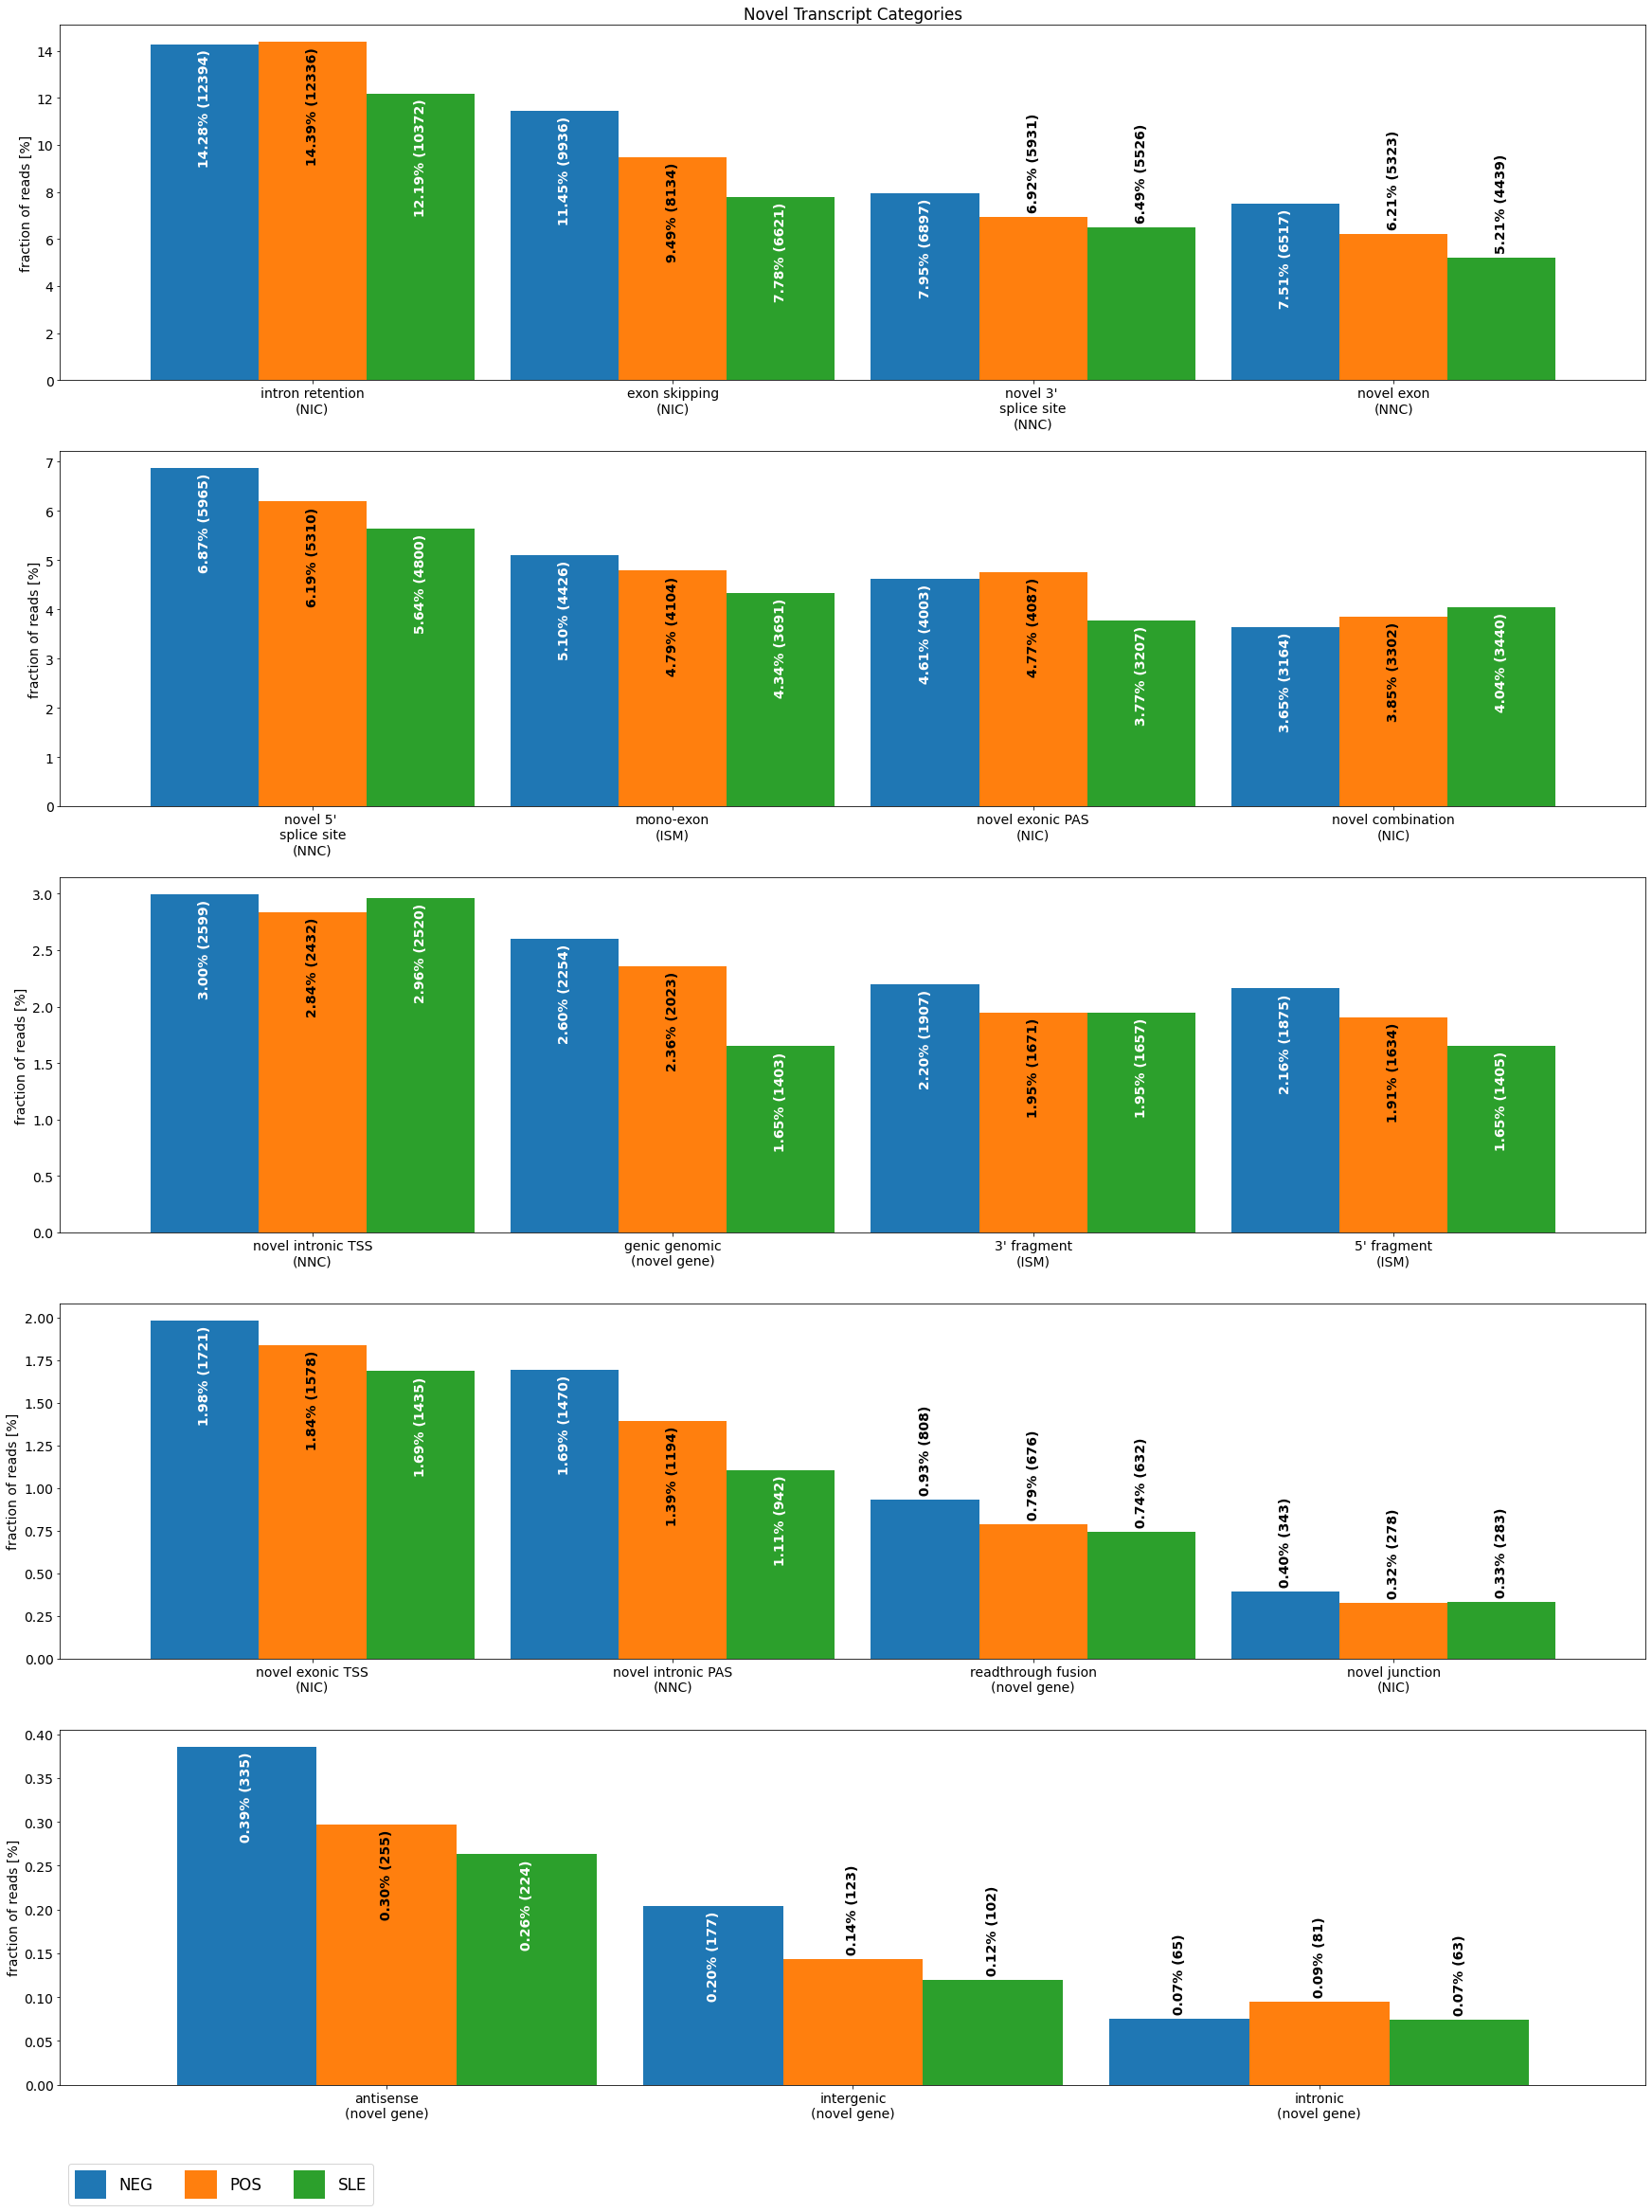

In [34]:
from isotools.plots import plot_bar, plot_distr

plt.rcParams["figure.figsize"] = (30,40)
fig, axs = plt.subplots( 5)
for i,ax in enumerate(axs):
    cat=altsplice[0][0].index[i*4+2:(i+1)*4+2]
    plot_bar(altsplice[0][0],bar_width=.9,ax=ax,ylabel='fraction of reads [%]', legend=False, rot=0,drop_categories=[c for c in altsplice[0][0].index if c not in cat])
axs[-1].legend(fontsize='large', ncol=7,handleheight=2.4, labelspacing=0.05, bbox_to_anchor=(0, -.2), loc='upper left')
_=axs[0].set_title('Novel Transcript Categories')
plt.savefig(fname="novel_xscript_cats.png")

In [35]:
def plot_diff_example(row, isoseq, groups):
    #sashimi plot for differential spliced genes
    plt.rcParams["figure.figsize"] = (15,10)
    #select gene object
    g=isoseq[row.gene_id]
    #make the title
    gn=list(groups)
    novel='novel' if row.novel else 'known'
    title=f'{g.name} {row.splice_type} ({novel}) FDR={row.padj:.2e}: {gn[0]}={row[gn[0]+"_PSI"]*100:.1f} vs {gn[1]}={row[gn[1]+"_PSI"]*100:.1f} PSI'
    print(title)
    start=row.start
    end=row.end
    #select the junctions of interest (which will be marked purple in the plot)
    joi=[(start,end)]
    if row.splice_type=='ME' and g.is_annotated:
        try:
            sg=g.ref_segment_graph
            n1=next(n for n in sg if n[1]==start)
            n2=next(n for n in sg if n[0]==end)
            joi={(start,sg[suc].start) for suc in n1.suc.values() if sg[suc].start<end }
            joi.update({(sg[pre].end,end) for pre in n2.pre.values() if sg[pre].end>start })
        except:
            pass
    #draw the plot for the two sample groups from the comparison
    f,axs=g.sashimi_figure(samples=groups , x_range=(start-500, end+500),junctions_of_interest=joi    )
    axs[0].set_title(title)
    fig.tight_layout()

In [36]:
from isotools.plots import plot_diff_results
#We are mostly interested in differential splicing. Alternative TSS and PAS are ignored for now.
types_of_interest=['ES','ME','5AS','3AS']
#dict to store the results in
res={}

In [37]:
diff_cmp='NEG/SLE'
groups={k:sample_groups[k] for k in diff_cmp.split('/')}

#takes about 20 min
res[diff_cmp]=isoseq.altsplice_test(groups).sort_values('pvalue').reset_index()
res[diff_cmp].to_csv(f'encode_diff_betabinomial_{"_".join(groups)}.csv', index=False)
#res[diff_cmp]=pd.read_csv(f'encode_diff_betabinomial_{"_".join(groups)}.csv')
sig=res[diff_cmp].padj<.1
print(f'{sum(sig)} differential splice sites in {len(res[diff_cmp].loc[sig,"gene"].unique())} genes for {" vs ".join(groups)}')
res[diff_cmp][res[diff_cmp].splice_type.isin(types_of_interest)].head(10)

[altsplice_test(232)]: testing differential splicing for NEG (4) vs SLE (4) using betabinom_lr test
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75593/75593 [00:13<00:00, 5449.08it/s]


0 differential splice sites in 0 genes for NEG vs SLE


index     gene             gene_id  chrom strand      start        end  \
4     449   PECAM1   ENSG00000261371.6  chr17      -   64329722   64348259   
6     709   SH3TC1  ENSG00000125089.18   chr4      +    8232156    8233362   
11    376    ANPEP  ENSG00000166825.15  chr15      -   89804617   89805077   
17    627    MTMR3  ENSG00000100330.16  chr22      +   30020884   30022608   
23    424     CLTC  ENSG00000141367.12  chr17      +   59683985   59685586   
24    509   ADGRE5  ENSG00000123146.20  chr19      +   14391079   14397657   
25    581     DYSF  ENSG00000135636.15   chr2      +   71613410   71643964   
43    152  ARHGEF2  ENSG00000116584.20   chr1      -  155948015  155950298   
44    747  MARCHF6  ENSG00000145495.16   chr5      +   10423824   10429892   
45    154  ARHGEF2  ENSG00000116584.20   chr1      -  155965412  155966415   

   splice_type  novel  padj  ...  510099_NEG_in_cov  510099_NEG_total_cov  \
4           ES   True   1.0  ...                 26                    30   
6          3AS   True   1.0  ...                  2                     8   
11         5AS   True   1.0  ...                  1                     7   
17          ES  False   1.0  ...                 11                    15   
23          ES   True   1.0  ...                 11                    13   
24          ES  False   1.0  ...                 11                    21   
25          ES  False   1.0  ...                  4                    14   
43         5AS   True   1.0  ...                 17                    35   
44          ES   True   1.0  ...                 10                    11   
45          ES   True   1.0  ...                 21                    29   

    590108-5-4_SLE_in_cov  590108-5-4_SLE_total_cov  550003-6-2_SLE_in_cov  \
4                      36                        41                     23   
6                       1                        17                      0   
11                      0                         8                      0   
17                      8                        11                     10   
23                     11                        12                     15   
24                     11                        16                      9   
25                      6                        10                     18   
43                      4                         8                      7   
44                     14                        14                     11   
45                      6                         8                     12   

    550003-6-2_SLE_total_cov  500066-6-2_SLE_in_cov  500066-6-2_SLE_total_cov  \
4                         23                     35                        36   
6                          6                      1                        11   
11                        10                      0                         8   
17                        12                     11                        13   
23                        16                     10                        10   
24                        15                     15                        25   
25                        33                      3                         9   
43                        20                      4                        15   
44                        11                     12                        14   
45                        16                     12                        15   

    500028-6-4_SLE_in_cov  500028-6-4_SLE_total_cov  
4                      24                        25  
6                       2                        10  
11                      1                        17  
17                     12                        18  
23                     16                        16  
24                     12                        21  
25                     12                        18  
43                      8                        21  
44                     12                        13  
45    

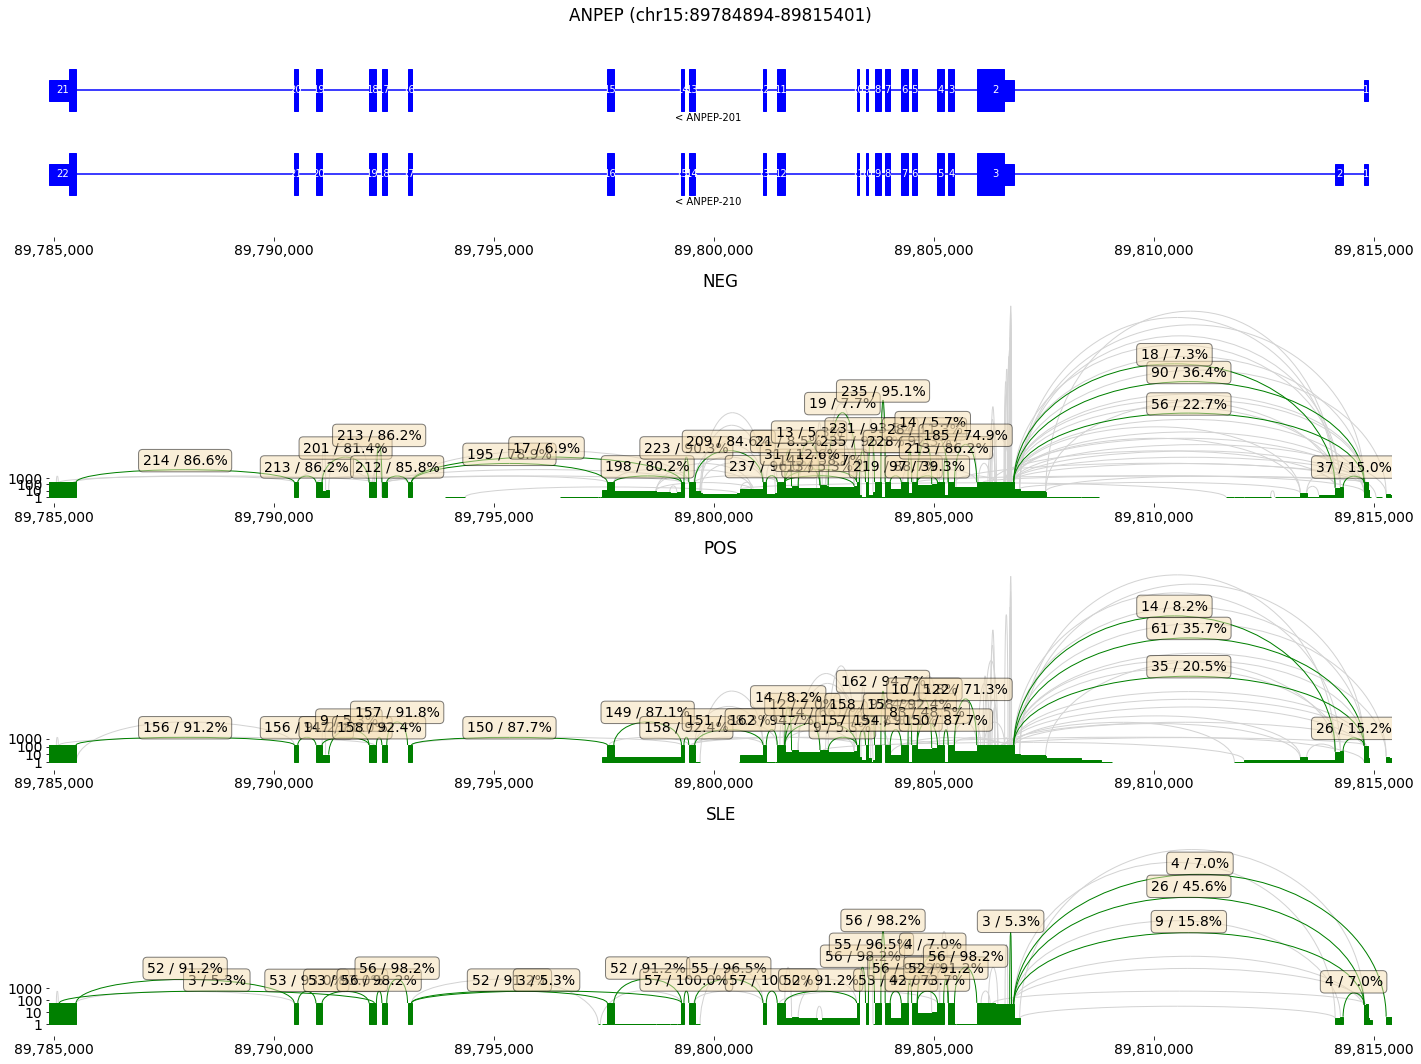

In [38]:
goi = "ANPEP"
plt.rcParams["figure.figsize"] = (20,15)
fig,axs=isoseq[goi].sashimi_figure(samples=sample_groups, x_range=[int(_) for _ in coord.search(isoseq[goi].region).group(0).split("-")])
fig.tight_layout()

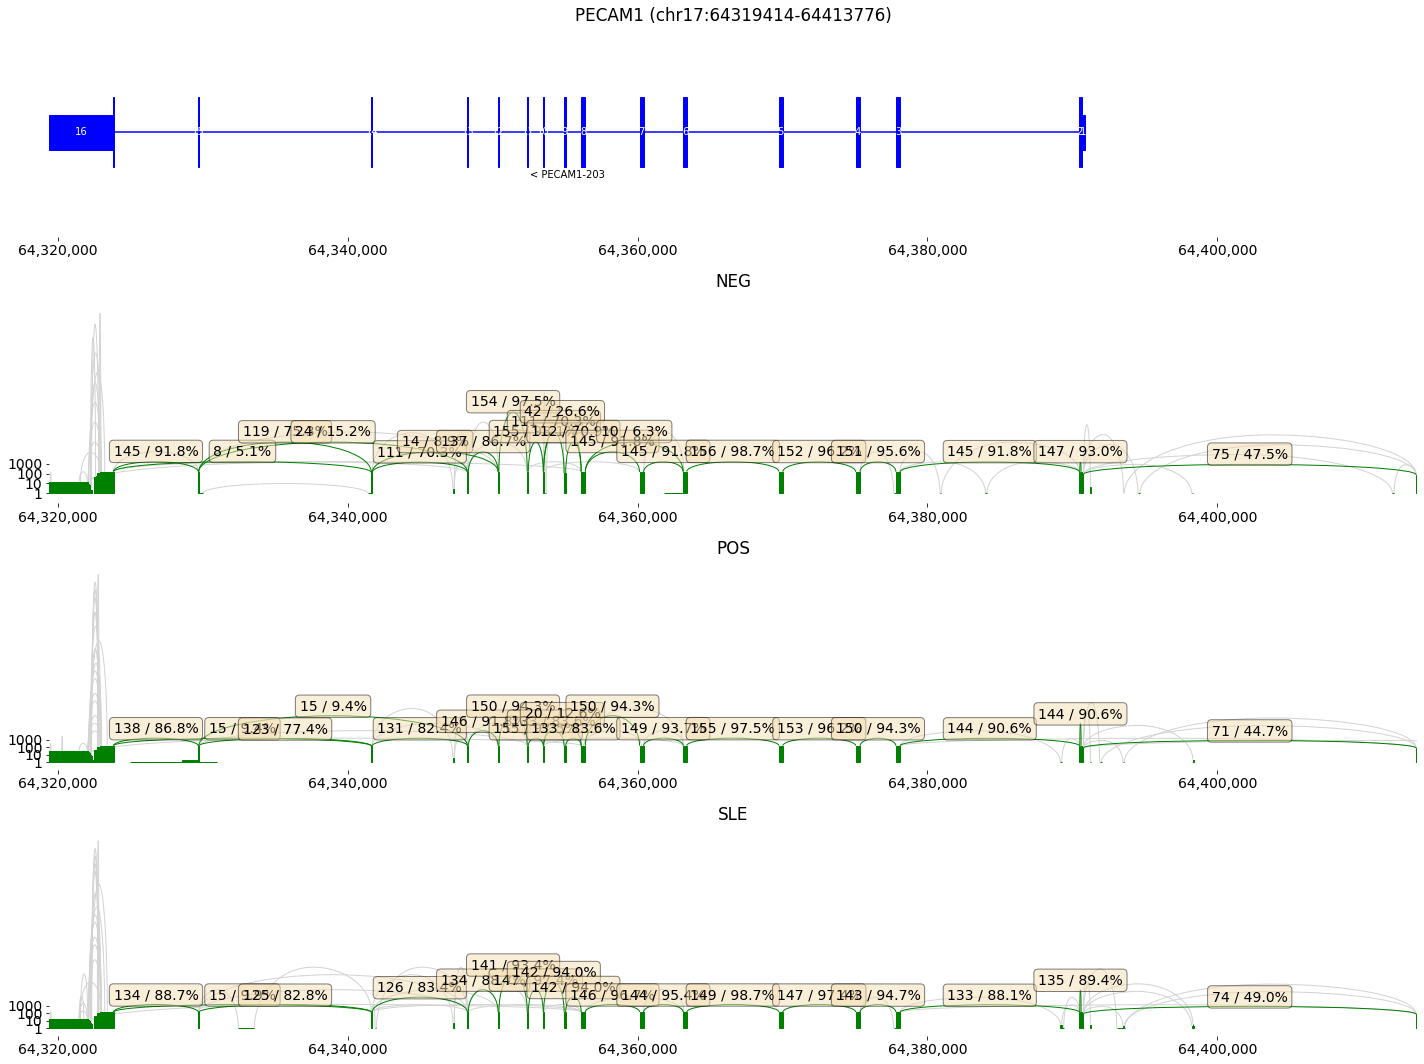

In [39]:
goi = "PECAM1"
plt.rcParams["figure.figsize"] = (20,15)
fig,axs=isoseq[goi].sashimi_figure(samples=sample_groups, x_range=[int(_) for _ in coord.search(isoseq[goi].region).group(0).split("-")])
fig.tight_layout()

In [40]:
res[diff_cmp].sort_values("padj")

index    gene             gene_id  chrom strand      start        end  \
0      859    CD36  ENSG00000135218.19   chr7      +   80638627   80638746   
636    262   DUSP6   ENSG00000139318.8  chr12      -   89351639   89352497   
637    781   CSF1R  ENSG00000182578.14   chr5      -  150054430  150055236   
638    180   ITGB1  ENSG00000150093.20  chr10      -   32900324   32901635   
639    692  NFKBIZ  ENSG00000144802.11   chr3      +  101849917  101852084   
..     ...     ...                 ...    ...    ...        ...        ...   
327     38    NCF2  ENSG00000116701.15   chr1      -  183568180  183570839   
328    442  CD300E   ENSG00000186407.7  chr17      -   74623581   74623850   
329     62     FGR  ENSG00000000938.13   chr1      -   27609366   27613122   
361     39    NCF2  ENSG00000116701.15   chr1      -  183590155  183590923   
965    319   SRSF5  ENSG00000100650.16  chr14      +   69767255   69768137   

    splice_type  novel  padj  ...  510099_NEG_in_cov  510099_NEG_total_cov  \
0           TSS   True   1.0  ...                 20                    20   
636         TSS   True   1.0  ...                 17                    29   
637          IR   True   1.0  ...                  4                    29   
638         PAS   True   1.0  ...                  4                     5   
639          IR   True   1.0  ...                  4                    11   
..          ...    ...   ...  ...                ...                   ...   
327         PAS   True   1.0  ...                  2                    23   
328         TSS  False   1.0  ...                 11                    13   
329         PAS   True   1.0  ...                 21                    22   
361         TSS   True   1.0  ...                 18                    23   
965         5AS  False   1.0  ...                  3                    16   

     590108-5-4_SLE_in_cov  590108-5-4_SLE_total_cov  550003-6-2_SLE_in_cov  \
0                       18                        20                     18   
636                      5                        11                     11   
637                      1                        21                      2   
638                      6                         9                      3   
639                      3                        10                      5   
..                     ...                       ...                    ...   
327                      2                        17                      1   
328                     13                        17                     12   
329                     29                        32                     18   
361                     13                        17                     12   
965                      5                        18                      2   

     550003-6-2_SLE_total_cov  500066-6-2_SLE_in_cov  \
0                          24                     12   
636                        19                     16   
637                        18                      6   
638                         3                      9   
639                        15                      4   
..                        ...                    ...   
327                        13                      1   
328                        14                     12   
329                        22                     15   
361                        13                      7   
965                         8                      1   

     500066-6-2_SLE_total_cov  500028-6-4_SLE_in_cov  500028-6-4_SLE_total_cov  
0                          14                     21                        26  
636                        25                     10                        17  
637                        37                      3                        19  
638                        10                     10                        12  
639                        16                      8                        13  
..                     

In [41]:
res[diff_cmp].loc[:,["gene","padj"]].sort_values("padj").drop_duplicates()

gene  padj
0      CD36   1.0
636   DUSP6   1.0
637   CSF1R   1.0
638   ITGB1   1.0
639  NFKBIZ   1.0
..      ...   ...
411   CD163   1.0
384    JAK1   1.0
439  ADAM10   1.0
310    PAK2   1.0
326     OGT   1.0

[244 rows x 2 columns]

In [42]:
top_goi = np.unique(res[diff_cmp].loc[:,["gene","padj"]].sort_values("padj").drop_duplicates().loc[:,"gene"].values[1:10])
top_goi

array(['CSF1R', 'DUSP6', 'EIF4A2', 'HNRNPA2B1', 'ITGB1', 'KDM5C',
       'NFKBIZ', 'RAB10', 'SLC2A3'], dtype=object)

In [43]:
from typing import Dict, List, Optional

def plot_sashimi(goi: str, obj: isotools.transcriptome.Transcriptome, groups: Optional[Dict[str, List[str]]] = None) -> None:
    
    if groups is None:
        groups = obj.groups()
    
    coord = re.compile("[0-9]+\-[0-9]+")
    plt.rcParams["figure.figsize"] = (20,15)
    
    fig, axs = obj[goi].sashimi_figure(
        samples=groups,
        x_range=[
            int(_)
            for _
            in coord.search(obj[goi].region).group(0).split("-")
        ]
    )
    fig.tight_layout()

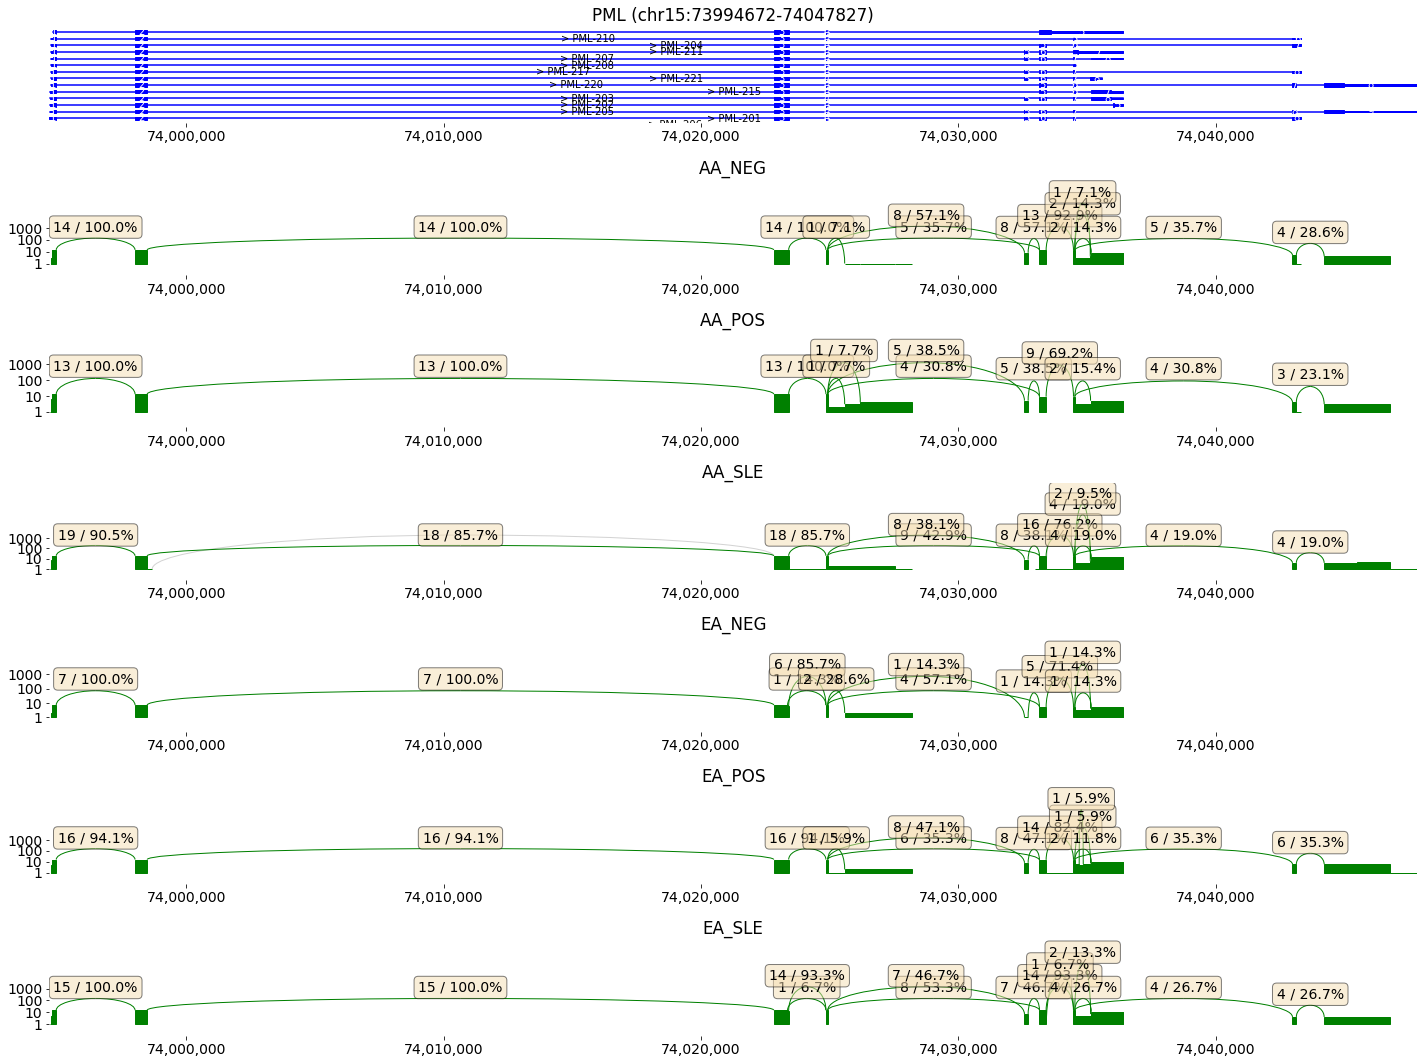

In [44]:
plot_sashimi("PML", isoseq)

In [45]:
from functools import partial

[None, None, None, None, None, None, None, None, None]

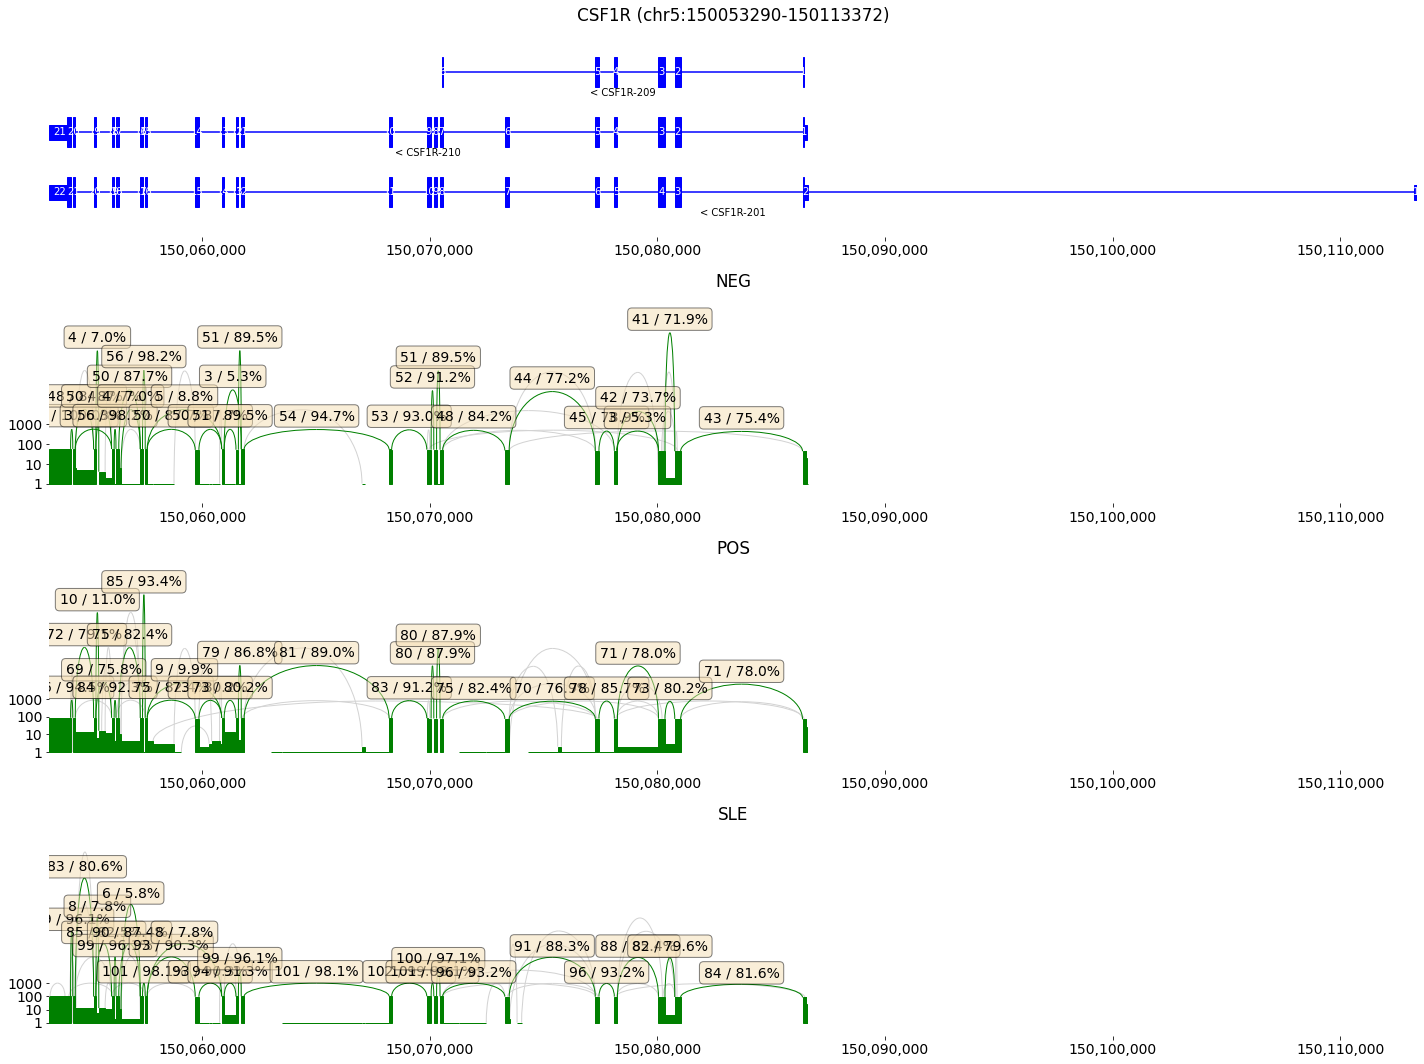

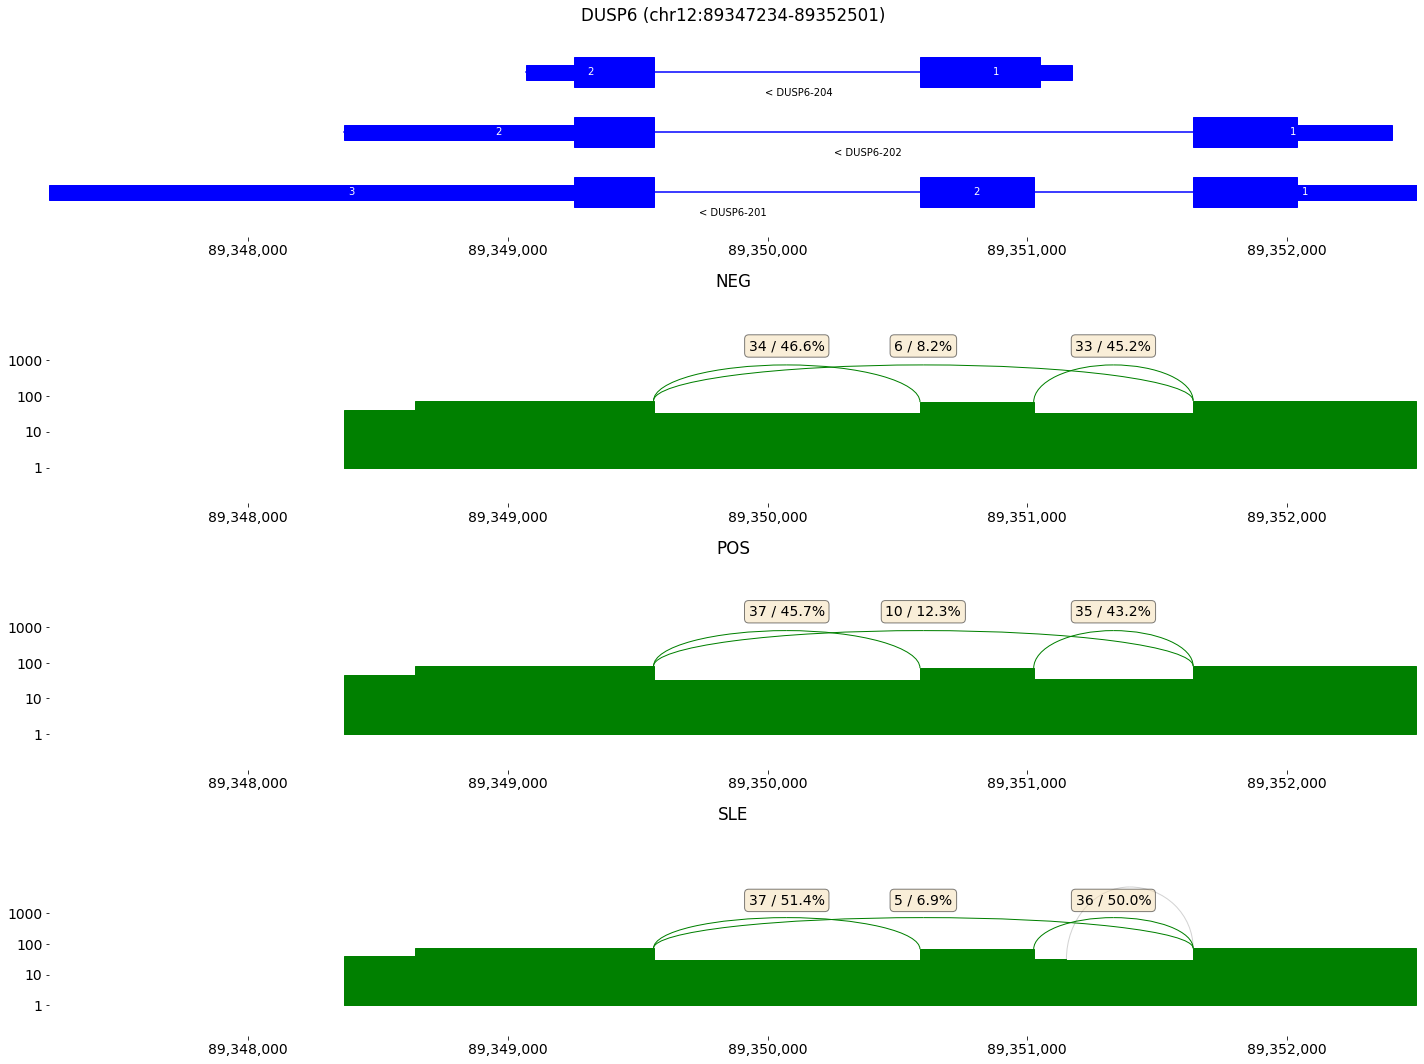

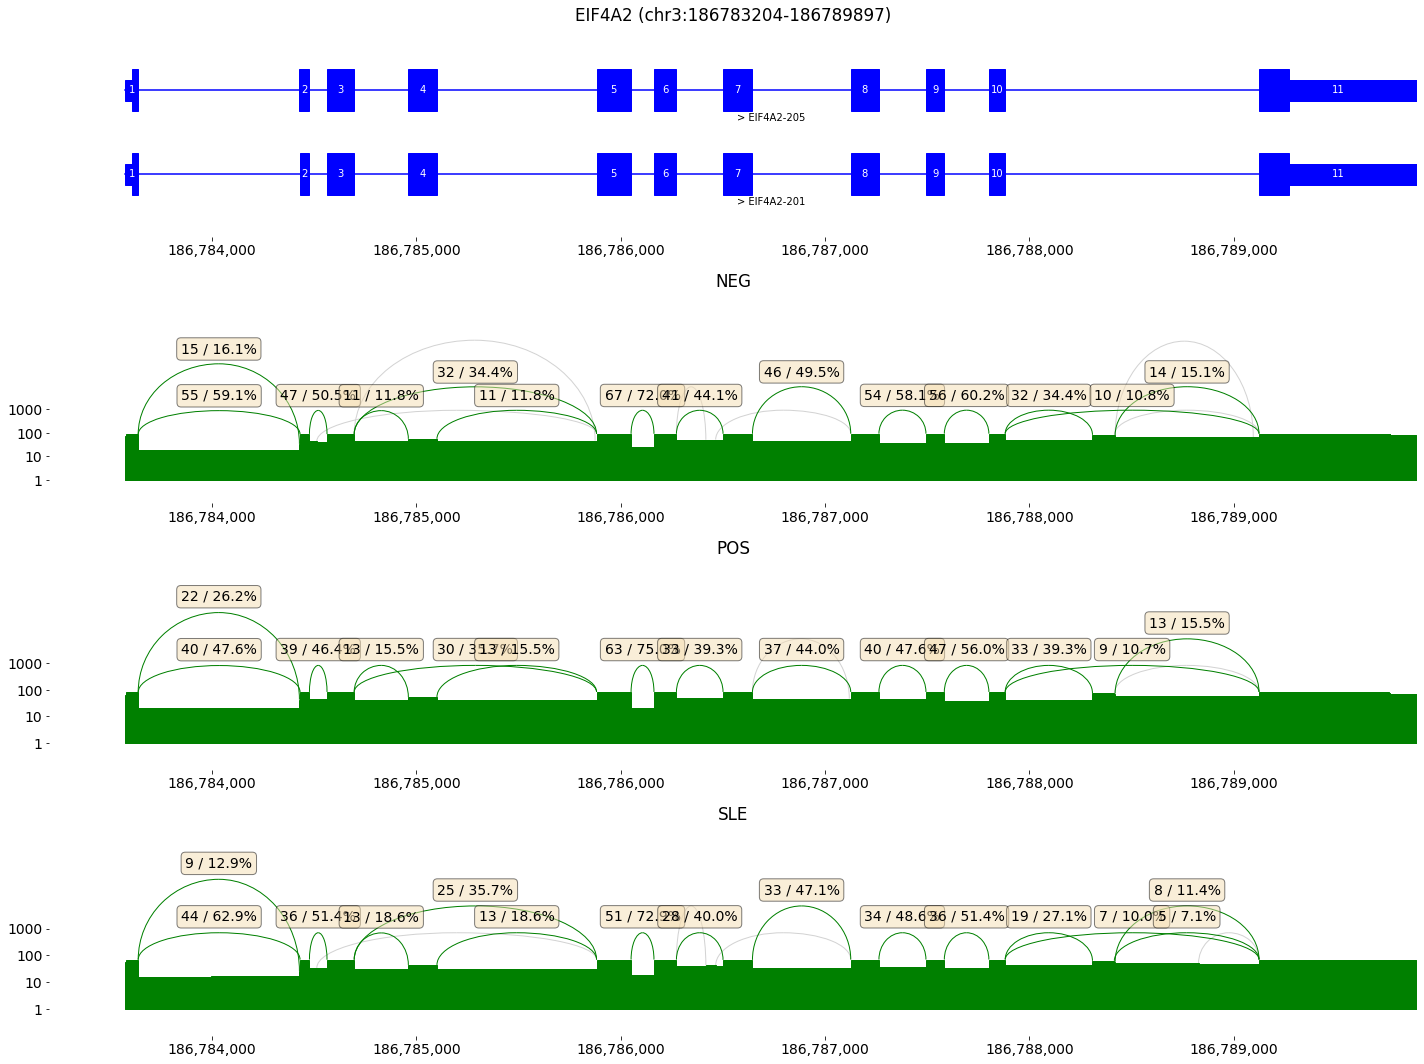

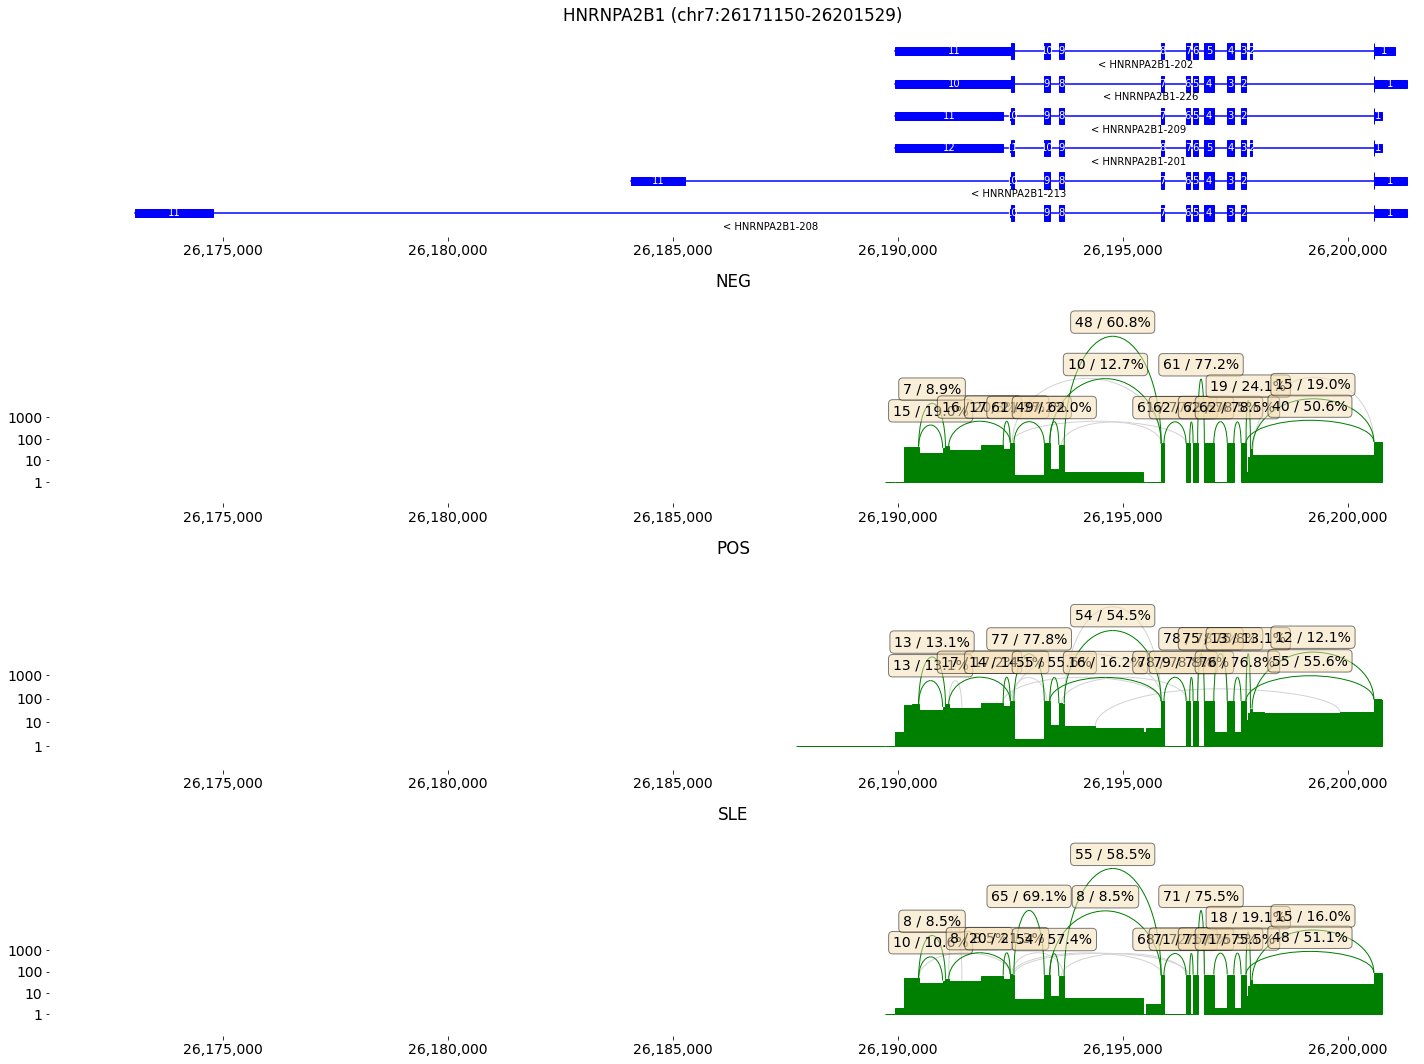

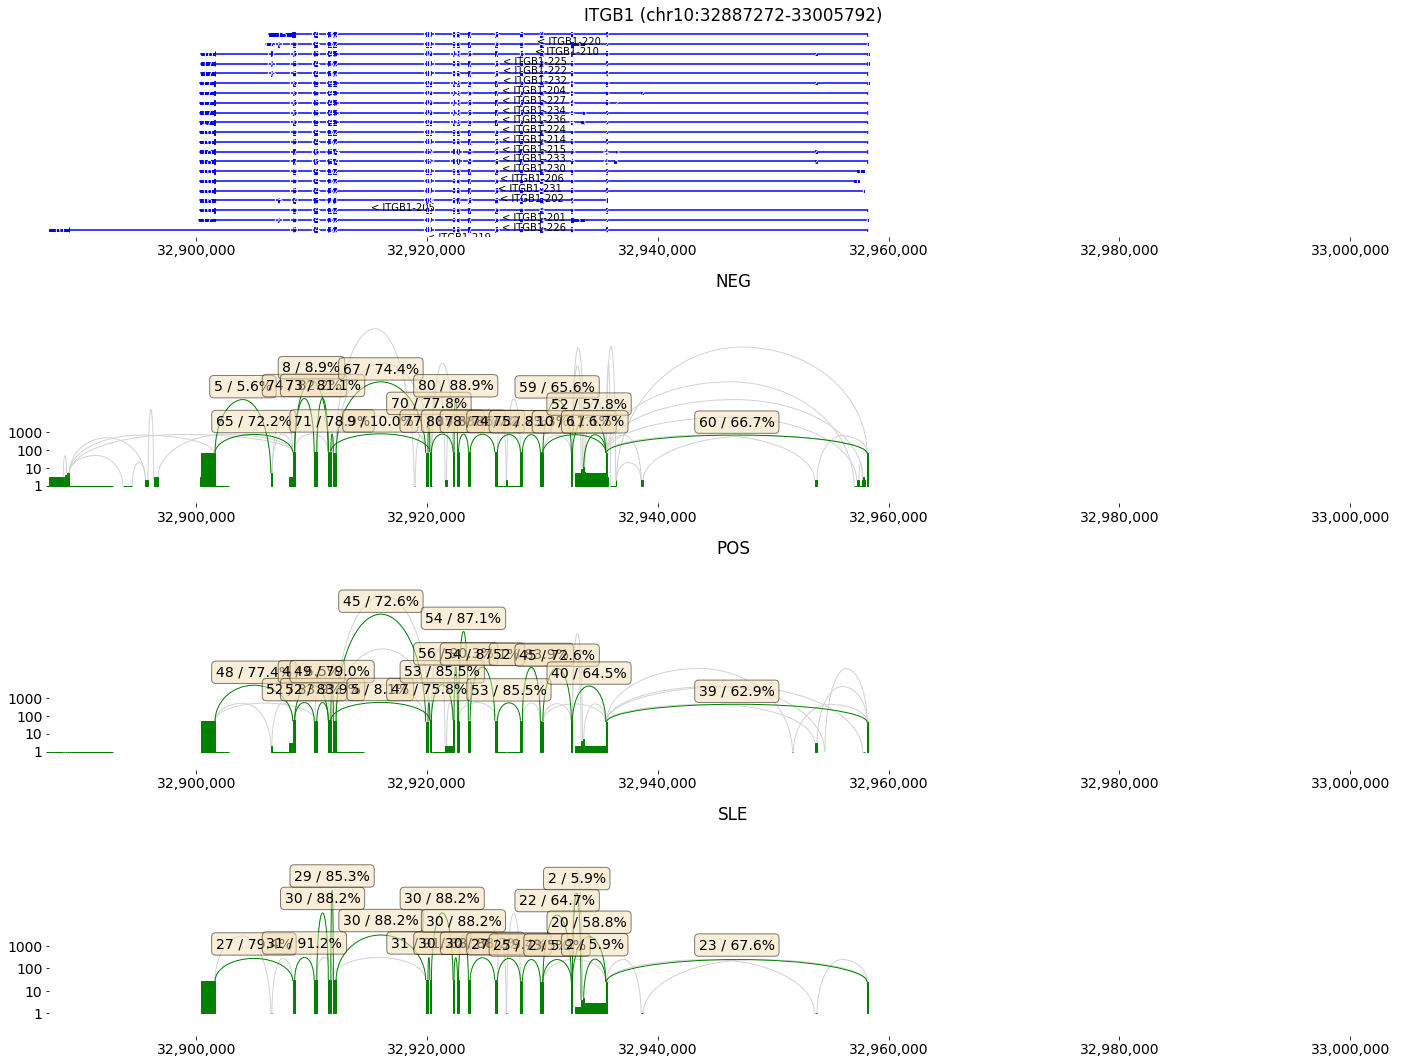

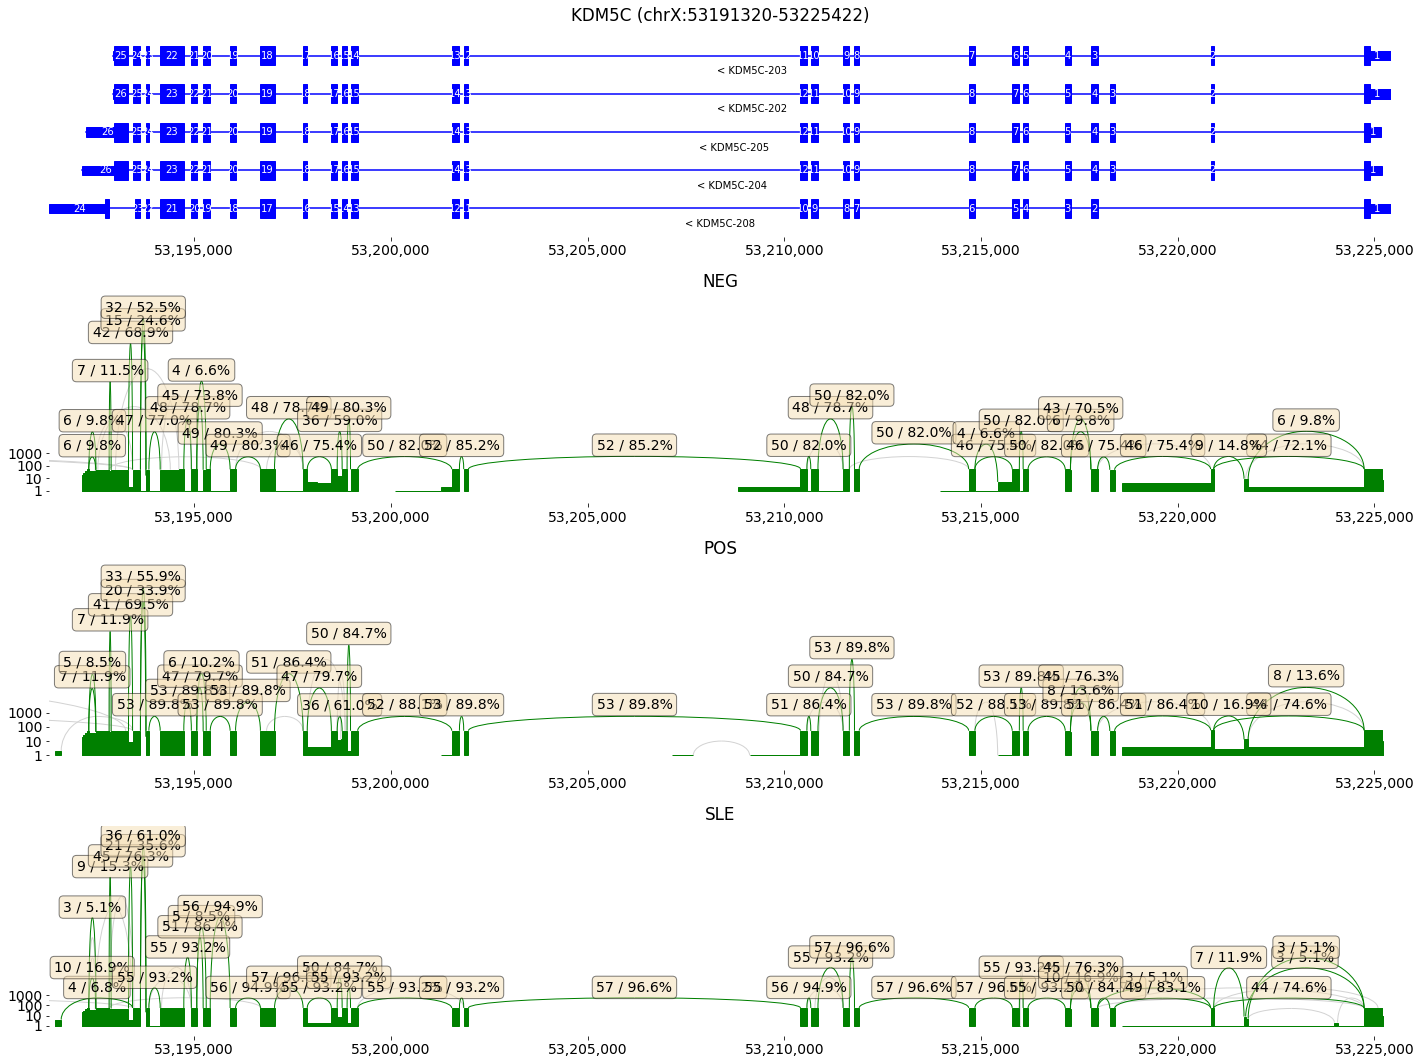

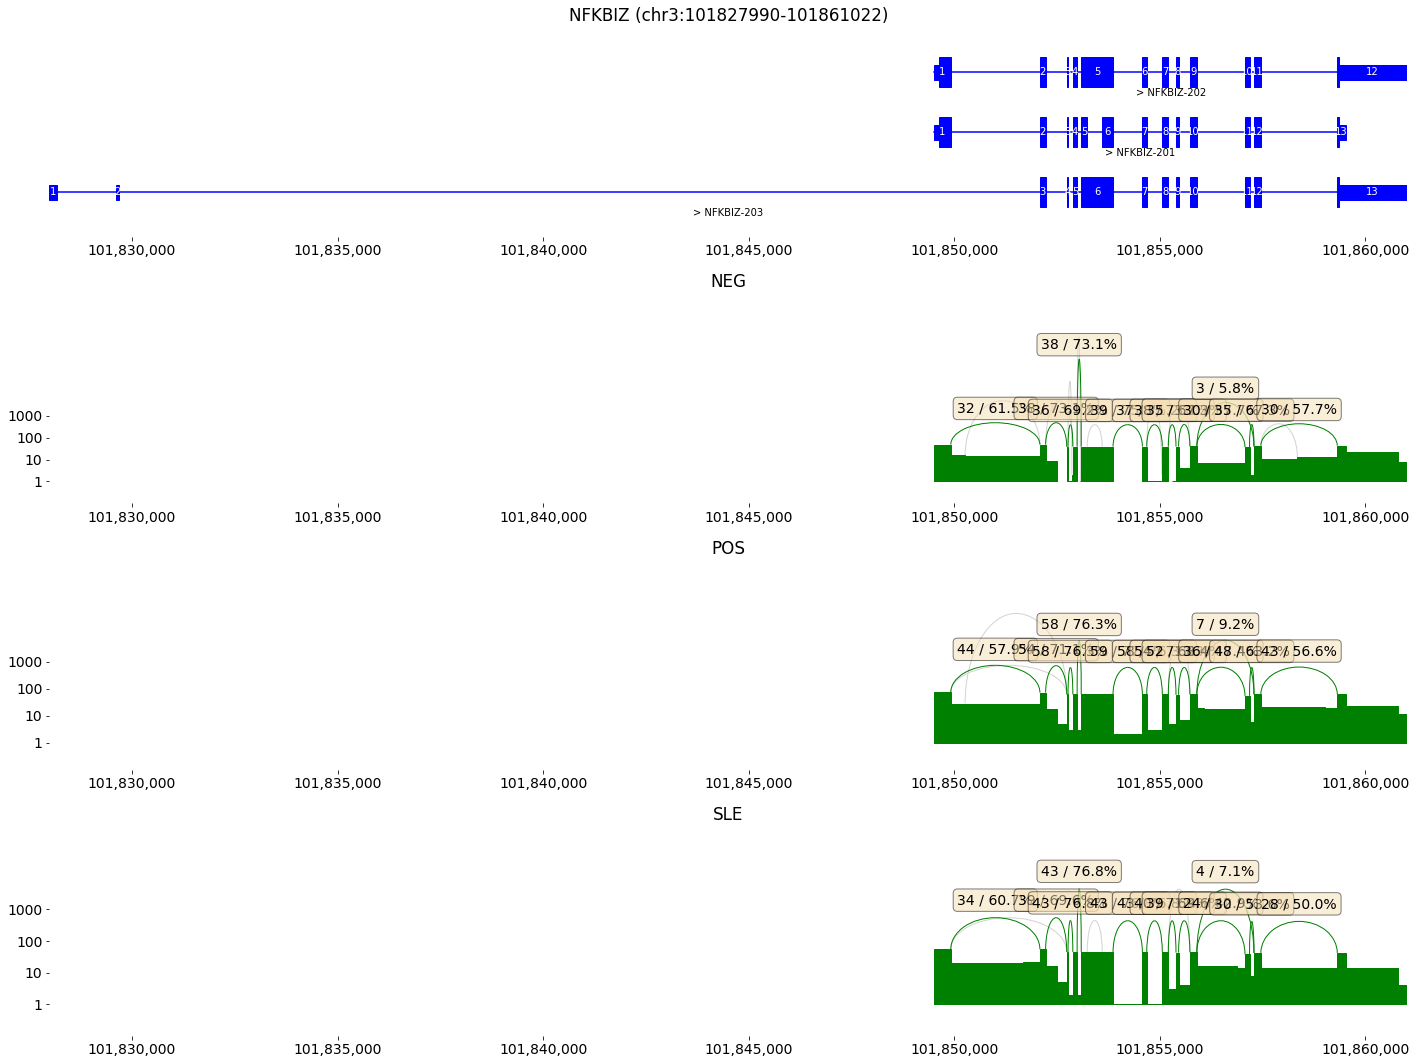

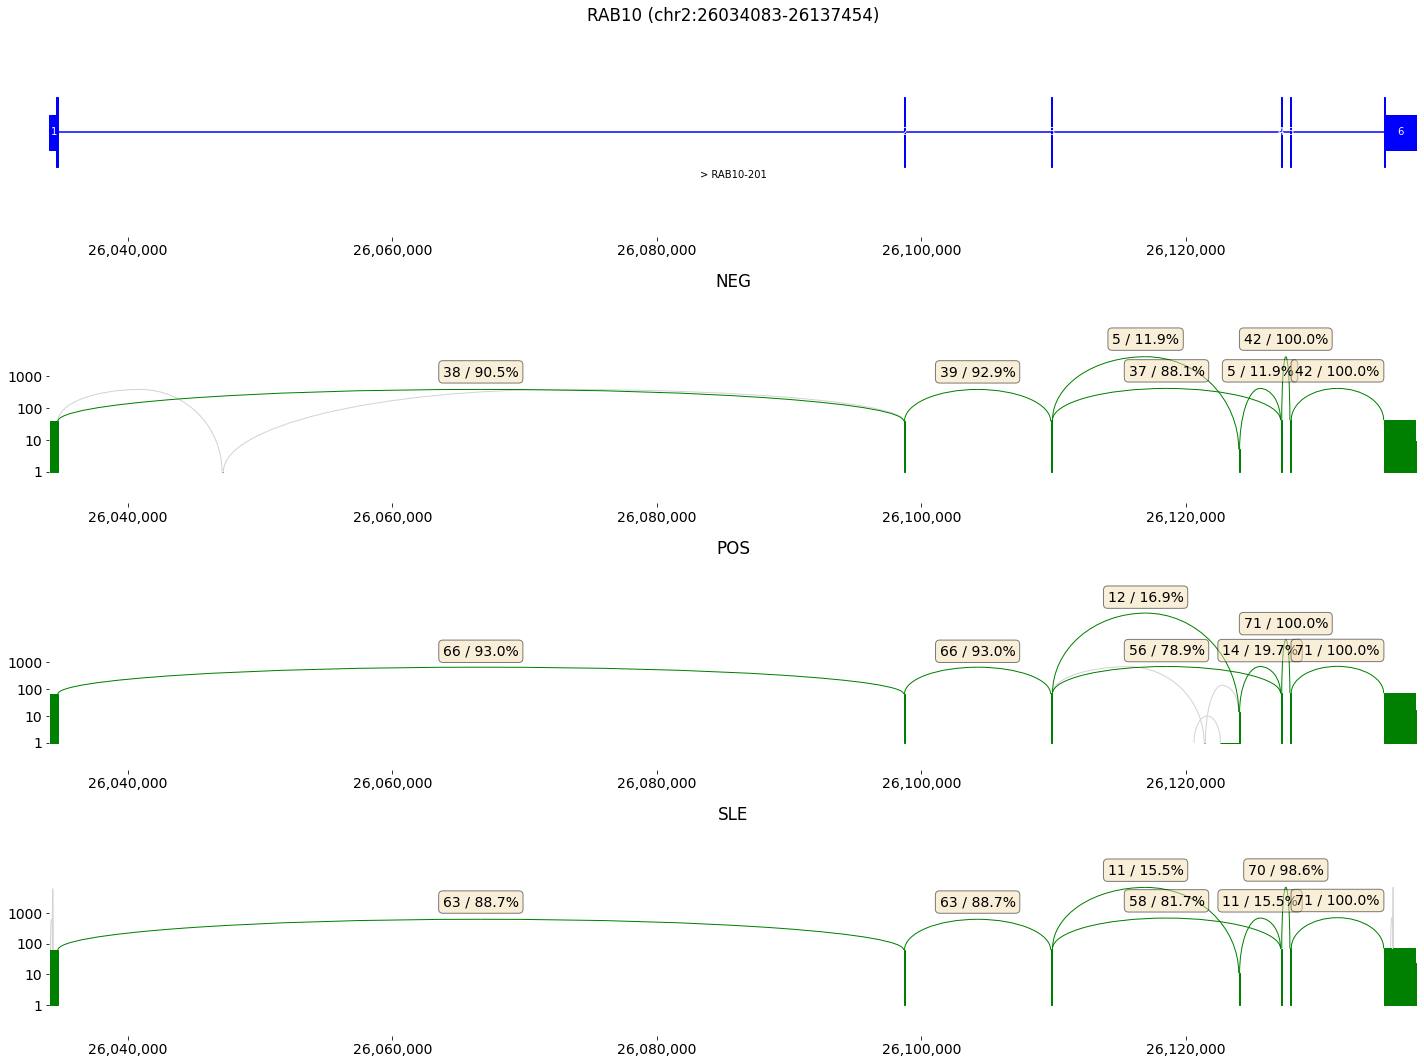

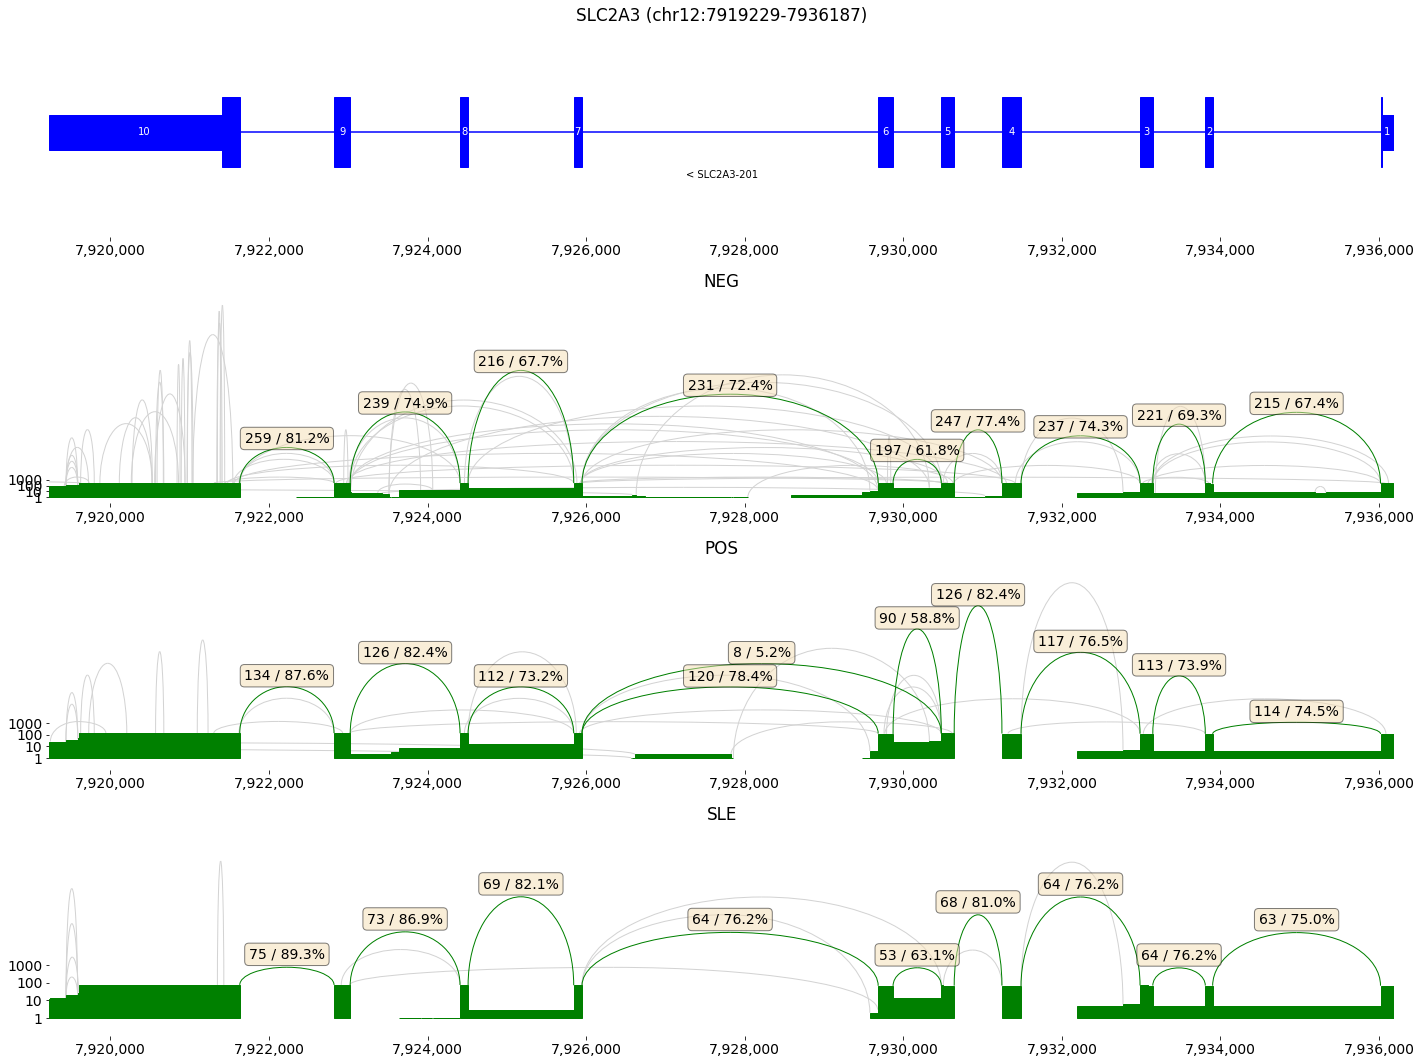

In [46]:
ps_part = partial(plot_sashimi, obj=isoseq, groups=sample_groups)
list(map(ps_part, top_goi))

In [47]:
isoseq.save("all_pilot_samples.pkl")

[save(88)]: saving transcriptome to all_pilot_samples.pkl


# Compare Differential splicing

In [48]:
from isotools.plots import plot_diff_results
#We are mostly interested in differential splicing. Alternative TSS and PAS are ignored for now.
types_of_interest=['ES','ME','5AS','3AS']
#dict to store the results in
res={}

In [49]:
diff_cmp = "NEG/SLE"

#takes about 20 min
res[diff_cmp]=isoseq.altsplice_test(groups).sort_values('pvalue').reset_index()
res[diff_cmp].to_csv(f'encode_diff_betabinomial_{"_".join(groups)}.csv', index=False)
#res[diff_cmp]=pd.read_csv(f'encode_diff_betabinomial_{"_".join(groups)}.csv')
sig=res[diff_cmp].padj<.1
print(f'{sum(sig)} differential splice sites in {len(res[diff_cmp].loc[sig,"gene"].unique())} genes for {" vs ".join(groups)}')
res[diff_cmp][res[diff_cmp].splice_type.isin(types_of_interest)].head(10).iloc[:,1:10]

[altsplice_test(232)]: testing differential splicing for NEG (4) vs SLE (4) using betabinom_lr test
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 75593/75593 [00:13<00:00, 5766.47it/s]


0 differential splice sites in 0 genes for NEG vs SLE


gene             gene_id  chrom strand      start        end  \
4    PECAM1   ENSG00000261371.6  chr17      -   64329722   64348259   
6    SH3TC1  ENSG00000125089.18   chr4      +    8232156    8233362   
11    ANPEP  ENSG00000166825.15  chr15      -   89804617   89805077   
17    MTMR3  ENSG00000100330.16  chr22      +   30020884   30022608   
23     CLTC  ENSG00000141367.12  chr17      +   59683985   59685586   
24   ADGRE5  ENSG00000123146.20  chr19      +   14391079   14397657   
25     DYSF  ENSG00000135636.15   chr2      +   71613410   71643964   
43  ARHGEF2  ENSG00000116584.20   chr1      -  155948015  155950298   
44  MARCHF6  ENSG00000145495.16   chr5      +   10423824   10429892   
45  ARHGEF2  ENSG00000116584.20   chr1      -  155965412  155966415   

   splice_type  novel  padj  
4           ES   True   1.0  
6          3AS   True   1.0  
11         5AS   True   1.0  
17          ES  False   1.0  
23          ES   True   1.0  
24          ES  False   1.0  
25          ES  False   1.0  
43         5AS   True   1.0  
44          ES   True   1.0  
45          ES   True   1.0

In [50]:
res[diff_cmp][res[diff_cmp].splice_type.isin(types_of_interest)].head(10).iloc[:,1:17]

gene             gene_id  chrom strand      start        end  \
4    PECAM1   ENSG00000261371.6  chr17      -   64329722   64348259   
6    SH3TC1  ENSG00000125089.18   chr4      +    8232156    8233362   
11    ANPEP  ENSG00000166825.15  chr15      -   89804617   89805077   
17    MTMR3  ENSG00000100330.16  chr22      +   30020884   30022608   
23     CLTC  ENSG00000141367.12  chr17      +   59683985   59685586   
24   ADGRE5  ENSG00000123146.20  chr19      +   14391079   14397657   
25     DYSF  ENSG00000135636.15   chr2      +   71613410   71643964   
43  ARHGEF2  ENSG00000116584.20   chr1      -  155948015  155950298   
44  MARCHF6  ENSG00000145495.16   chr5      +   10423824   10429892   
45  ARHGEF2  ENSG00000116584.20   chr1      -  155965412  155966415   

   splice_type  novel  padj    pvalue   NEG_PSI  NEG_disp   SLE_PSI  SLE_disp  \
4           ES   True   1.0  0.012325  0.813966  0.000018  0.946945  0.000800   
6          3AS   True   1.0  0.019702  0.378877  0.000167  0.090967  0.000010   
11         5AS   True   1.0  0.029301  0.229939  0.000023  0.023301  0.000003   
17          ES  False   1.0  0.042902  0.484045  0.041116  0.759181  0.000100   
23          ES   True   1.0  0.052651  0.788255  0.005354  0.962952  0.000004   
24          ES  False   1.0  0.052781  0.391732  0.000120  0.610292  0.000054   
25          ES  False   1.0  0.052835  0.338343  0.000142  0.557043  0.000123   
43         5AS   True   1.0  0.087340  0.539366  0.000066  0.359729  0.000039   
44          ES   True   1.0  0.091119  0.800092  0.000053  0.942324  0.000019   
45          ES   True   1.0  0.094542  0.598380  0.033286  0.754434  0.000021   

    total_PSI  total_disp  
4    0.881826    0.003736  
6    0.231926    0.014845  
11   0.114259    0.006395  
17   0.613096    0.035154  
23   0.873595    0.008401  
24   0.523187    0.000139  
25   0.446404    0.007153  
43   0.463995    0.000120  
44   0.869466    0.003145  
45   0.665004    0.017254

NXF1 TSS (novel) FDR=1.00e+00: NEG=72.5 vs SLE=97.8 PSI


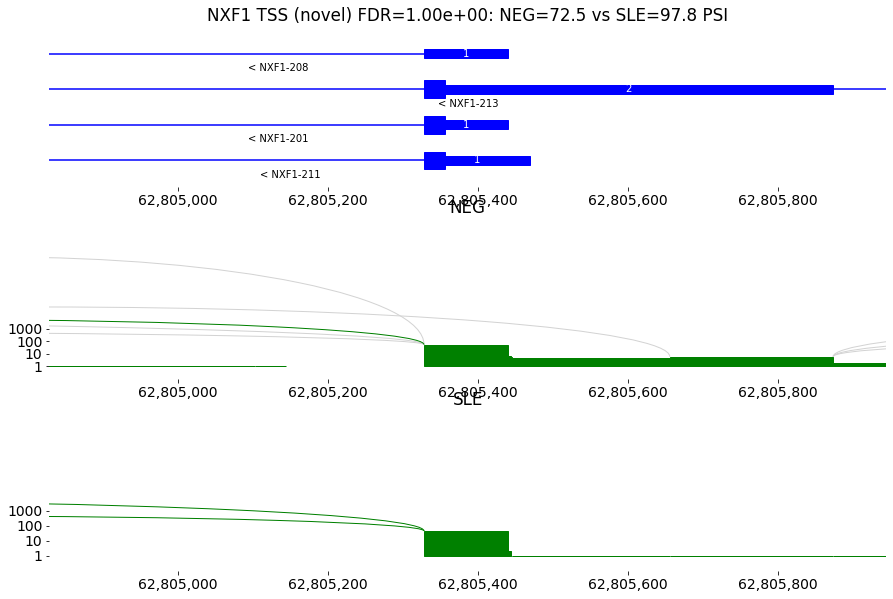

In [51]:
plot_diff_example(res[diff_cmp].iloc[1], isoseq, groups)

CHST15 TSS (novel) FDR=1.00e+00: NEG=25.6 vs SLE=53.5 PSI


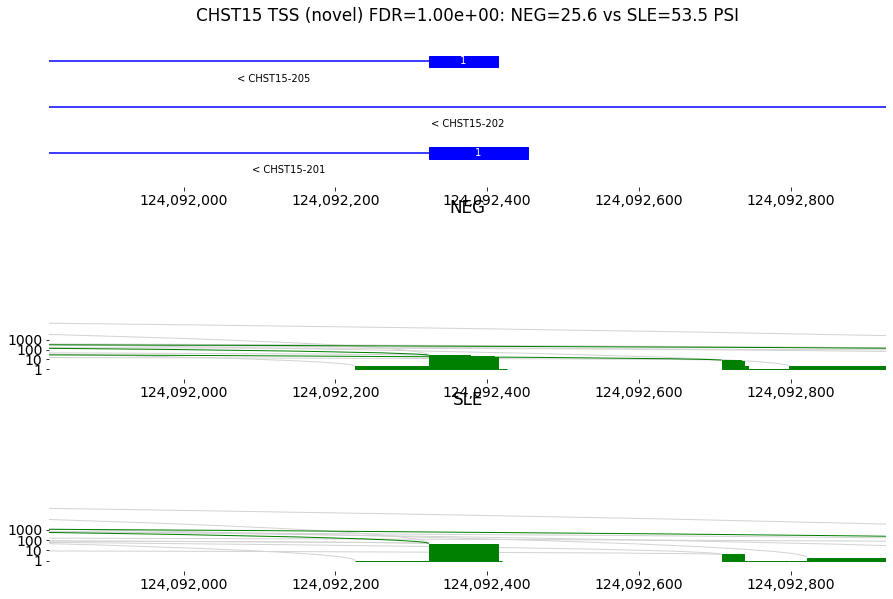

In [52]:
plot_diff_example(res[diff_cmp].iloc[2], isoseq, groups)

WIPF1 TSS (known) FDR=1.00e+00: NEG=32.6 vs SLE=56.3 PSI


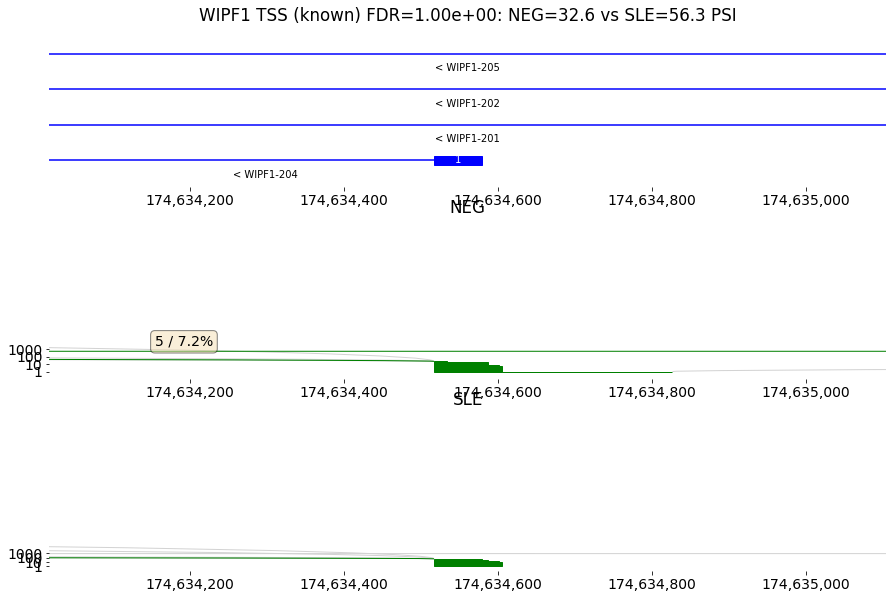

In [53]:
plot_diff_example(res[diff_cmp].iloc[3], isoseq, groups)

In [54]:
result_table=res[diff_cmp]
min_support=2,
min_diff=0.1
grid_shape=(5, 5)
splice_types=['ES', 'ME', '5AS', '3AS']

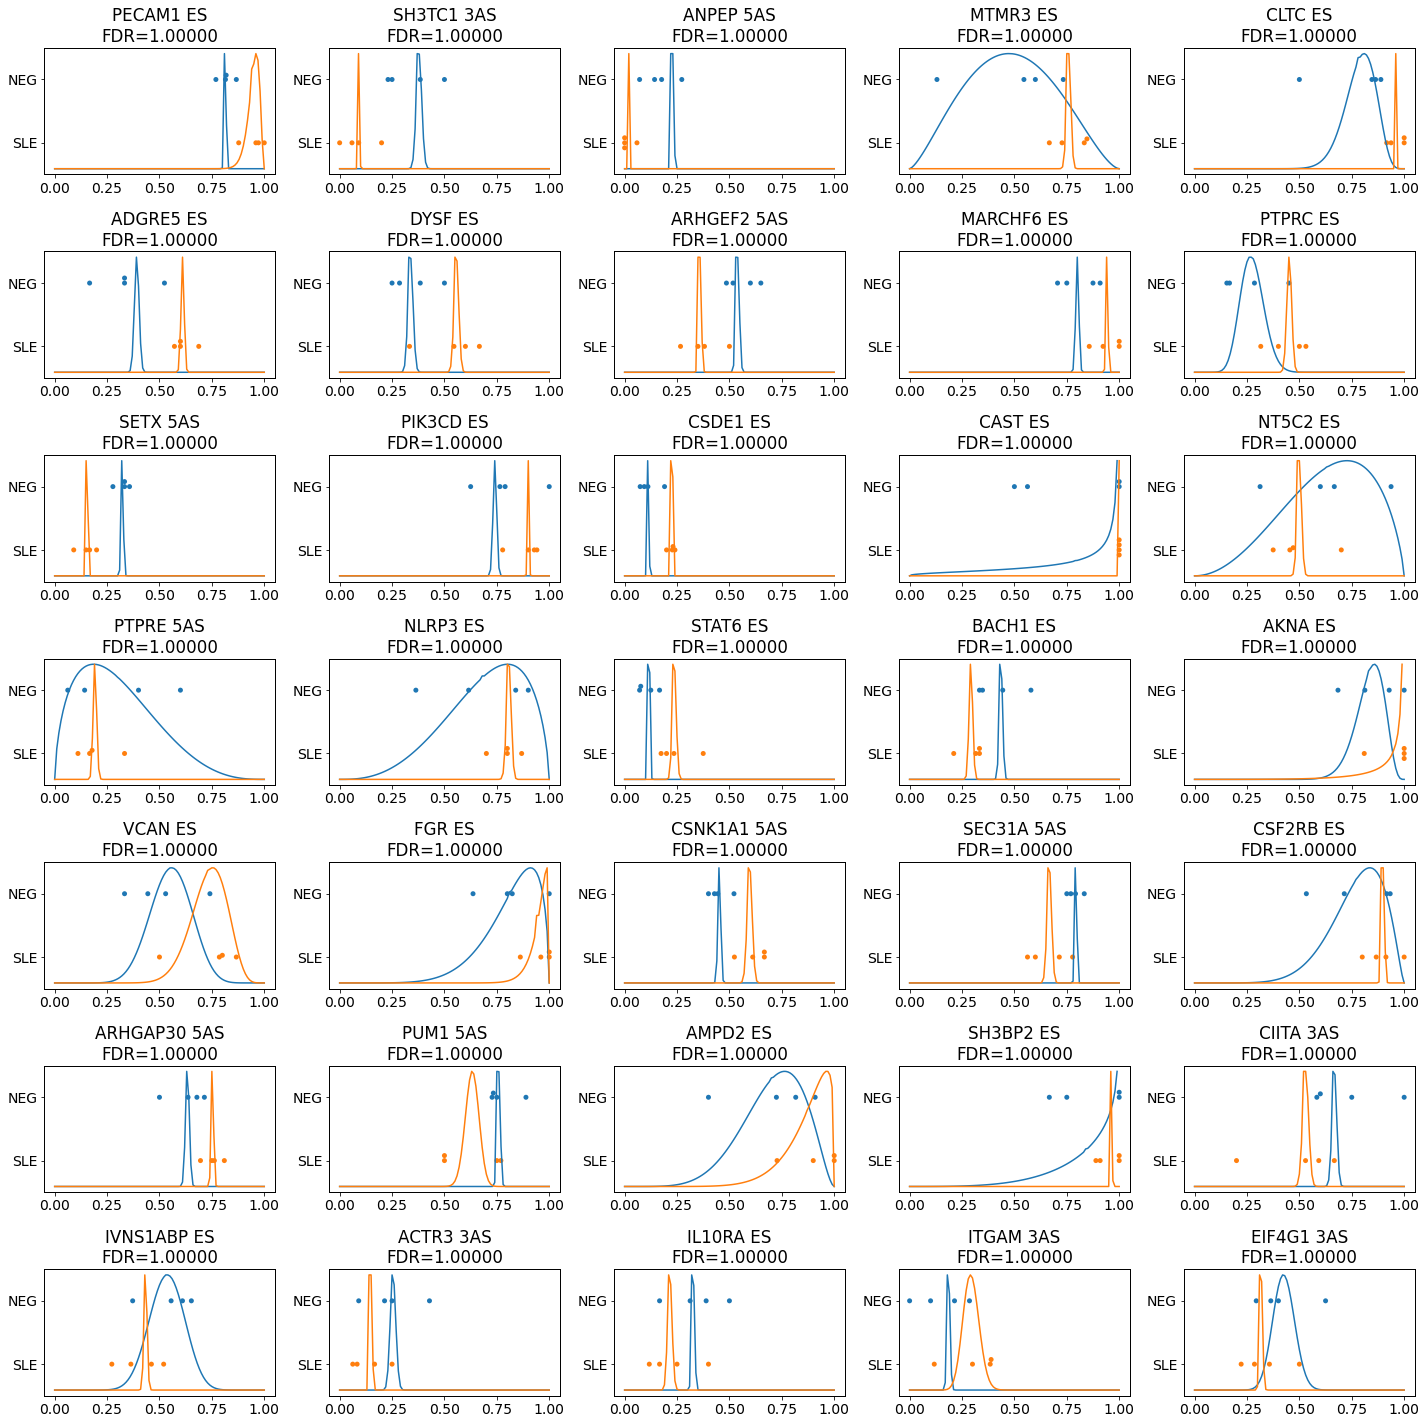

In [58]:
plt.rcParams["figure.figsize"] = (20,20)
f,axs,plotted=plot_diff_results(res[diff_cmp], min_diff=.1,grid_shape=(7,5),min_support=2, splice_types=['ES', 'ME', '5AS', '3AS'])
f.savefig(f'encode_diff_betabinomial_{"_".join(groups)}.png')
plotted.to_csv(f'encode_diff_betabinomial_plot_{"_".join(groups)}.csv', index=False)

In [65]:
sig=(res["NEG/SLE"].padj<.01) & (res["NEG/SLE"].splice_type.isin( ["ME", "ES","5AS","3AS","IR"]))
res["NEG/SLE"].loc[sig].head(20)


Empty DataFrame
Columns: [index, gene, gene_id, chrom, strand, start, end, splice_type, novel, padj, pvalue, NEG_PSI, NEG_disp, SLE_PSI, SLE_disp, total_PSI, total_disp, 590085-5-4_NEG_in_cov, 590085-5-4_NEG_total_cov, 541305_NEG_in_cov, 541305_NEG_total_cov, 541561_NEG_in_cov, 541561_NEG_total_cov, 510099_NEG_in_cov, 510099_NEG_total_cov, 590108-5-4_SLE_in_cov, 590108-5-4_SLE_total_cov, 550003-6-2_SLE_in_cov, 550003-6-2_SLE_total_cov, 500066-6-2_SLE_in_cov, 500066-6-2_SLE_total_cov, 500028-6-4_SLE_in_cov, 500028-6-4_SLE_total_cov]
Index: []

[0 rows x 33 columns]

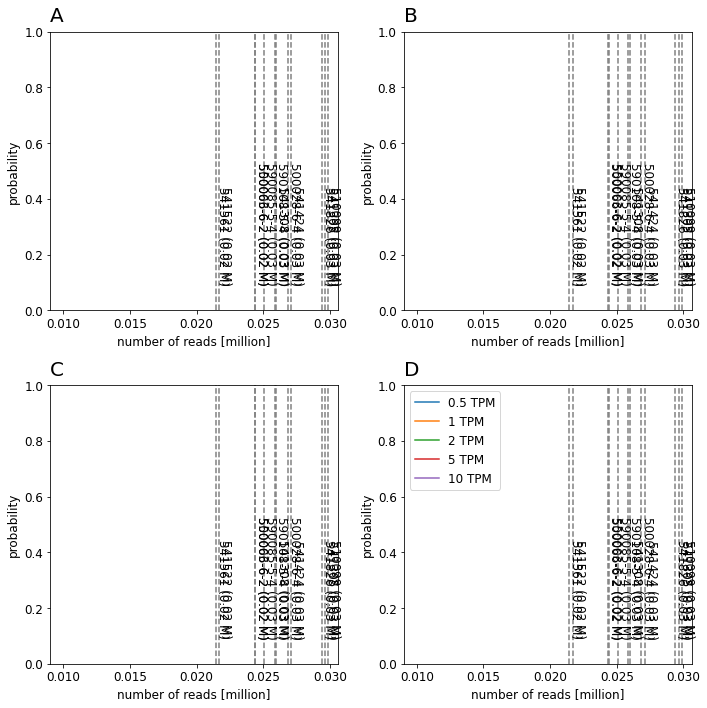

In [70]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 12})
f,axs=plt.subplots(2,2)
for nr,(ax,cov_th) in enumerate(zip(axs.flatten(),[1,2,5,10])):
    plot_saturation(isoseq, ax=ax,cov_th=cov_th, title='',x_range=(1e4,2e4,1e4), legend=False, xlabel='number of reads [million]', ylabel='probability')
    ax.set_title('ABCD'[nr],{'fontsize':20}, loc='left', pad=10)
ax.legend(loc='upper left')
f.tight_layout()